# MACHINE LEARNING MODEL FOR PREDICTING PROPERTY VALUE IN PHILADELPHIA
## BY : BETA ENGINEERS (PURWADHIKA)
## MEMBER :
1. Yehezkiel Gabriel Sutopo
2. Yohanna Inawati Santoso
3. Risdan Kristori

In [ ]:
# Import Libraries and Setting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[Sumber data Philadelphia Properties](https://www.kaggle.com/datasets/adebayo/philadelphia-buildings-database) 

<img src="pic/philadelphia.jpg" alt="isolated" width="800"/>

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# **Business Problem Understanding**

**Context**

Office of Property Assessment (OPA) merupakan salah satu departemen pada pemerintahan di Kota Philadelphia yang bertugas untuk menentukan nilai dari seluruh properti yang ada di Kota Philadelphia. Nilai dari setiap properti di Kota Philadelphia tersebut bermanfaat sebagai dasar pertimbangan masyarakat dalam menentukan harga transaksi properti milik mereka. Selain itu, nilai properti ini juga bermanfaat untuk menentukan nilai pajak dari setiap properti yang harus dibayarkan oleh pemilik properti tersebut, dimana pajak dari properti merupakan penyumbang terbesar dalam pendanaan sekolah umum di Kota Philadelphia.

Sebagai stakeholder yang berperan untuk menentukan nilai dari sebuah properti, OPA bertanggung jawab untuk memberikan nilai properti dengan cara yang adil, akurat, dan dapat dipahami sehingga properti dengan nilai yang sama dinilai dan dikenakan pajak dengan tarif yang sama. Dalam menentukan nilai properti, OPA mempertimbangkan beberapa hal seperti harga penjualan dan karakteristik properti. 


Nilai properti harus ditentukan secara tepat sesuai kondisi masing-masing properti. Jika nilai properti terlalu rendah, maka pendapatan pemerintah dari pajak properti akan berkurang (Hal ini akan berdampak terhadap pendanaan sekolah umum di Kota philadelphia) dan masyarakat juga akan melakukan komplain karena nilai properti tersebut mempengaruhi harga transaksi properti mereka. Di sisi lain, jika nilai properti terlalu tinggi, maka masyarakat akan melalukan komplain terhadap pemerintah karena harus membayarkan tarif pajak yang terlalu tinggi

Reference: https://www.phila.gov/departments/office-of-property-assessment/

**Problem Statement**

* Tipe properti apa saja yang memerlukan perhatian lebih dalam pelaksanaan quality control terhadap nilai propertinya?
* Tipe zoning properti apa yang memiliki jumlah terbanyak dan memiliki nilai properti tertinggi di Kota Philadelphia?
* Variabel apakah yang paling berpengaruh terhadap nilai properti di Kota Philadelphia?
* Model machine learning apakah yang dapat membantu OPA dalam memprediksi nilai properti dengan baik?

**Goals**

Berdasarkan permasalahan tersebut, OPA memerlukan analisis mendalam terkait nilai properti yang ada di Kota Philadelphia dan sebuah 'tool' yang dapat membantu mereka dalam menentukan nilai properti yang tepat berdasarkan karakteristik dari masing-masing properti.

**Analytic Approach**

Jadi, yang akan dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada dalam menentukan nilai properti berdasarkan karakteristiknya. Selanjutnya, kita akan membangun suatu model regresi yang akan membantu OPA untuk menentukan nilai properti tersebut.

**Metric Evaluation**

Dalam memilih model terbaik yang akan digunakan untuk memprediksi nilai properti perlu adanya matrix evaluasi yang sesuai. Pada data ini kami menggunakan matrix Mean Absolut Percentrage Error (MAPE) dan R-Squared. Penggunaan MAPE dikarenakan banyaknya nilai outlier yang terkandung di dalam data dan rentang nilai properti yang tinggi (1300 - 35214380), hal ini wajar karena di dalam data terkandung berbagai macam jenis properti mulai dari jenis residential hingga spesial properti seperti stadiun.

MAPE merupakan besaran yang mengukur residual (error) antara nilai hasil prediksi dengan nilai sebenarnya dalam besaran persen. Nilai residual yang dihitung adalah nilai absolut dan dibagi dengan nilai sebenarnya dikalikan 100 persen.


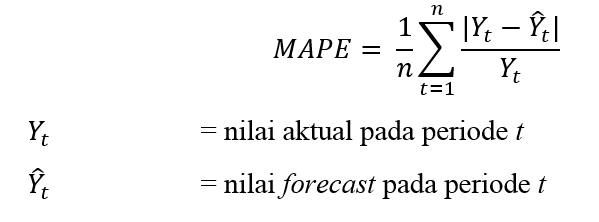


Berikut adalah kategori nilai MAPE:

1. 0-10% : Sangat baik
2. 10-20% : Baik
3. 20-50% : Wajar
4. '>50% : Tidak akurat

R-squared merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen mempengaruhi variabel dependen. R-squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Nilai R-squared (R2) digunakan untuk menilai seberapa besar pengaruh variabel independen tertentu terhadap variabel dependen. Nilai R-squared didapatkan dari persamaan berikut.

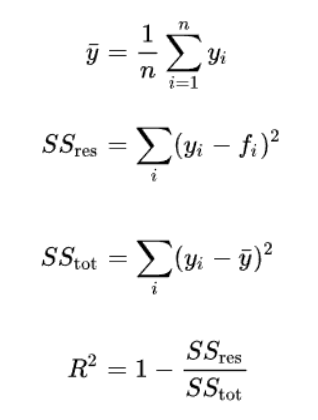

Dimana:
* yi	= Nilai variabel dependen yang sebenarnya
* fi	= Nilai variable dependen hasil prediksi

Terdapat tiga kategori pengelompokan pada nilai R-squared yaitu kategori kuat, kategori moderat, dan kategori lemah. Hair et al menyatakan bahwa nilai R squared 0,75 termasuk ke dalam kategori kuat, nilai R-squared 0,50 termasuk kategori moderat dan nilai R squared 0,25 termasuk kategori lemah (Hair et al., 2011).

Sumber: 
* https://stephenallwright.com/good-mape-score/
* https://accounting.binus.ac.id/2021/08/12/memahami-r-square-koefisien-determinasi-dalam-penelitian-ilmiah/#:~:text=R%20squared%20merupakan%20angka%20yang,tertentu%20terhadap%20variabel%20laten%20dependen.
* Hair, Jr., Joseph F., et. al. (2011). Multivariate Data Analysis. Fifth Edition. New Jersey: PrenticeHall, Inc.

# **Data Understanding**

* Dataset merupakan data karakteristik, harga sales, dan nilai properti yang ada di Kota Philadelphia hingga tahun 2020
* Setiap baris data merepresentasikan informasi terkait masing-masing properti

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| assessment_date | Object | Tanggal penilaian terakhir diubah|
| basements | Object | Jenis basement pada properti: <br/>0. Tidak ada basement<br/>A. Full Finished<br/>B. Full Semi-Finished<br/>C. Full Unfinished<br/>D. Full – Unknown Finish<br/>E. Partial Finished, F. Partial Semi-Finished, G. Partial Unfinished, H. Partial - Unknown Finish, I. Unknown Size - Finished, J. Unknown Size - Unfinished |
| beginning_point | Object | Titik pertama pada batas properti yang dijelaskan. |
| book_and_page  | Object | Menunjukkan dokumen pesanan yang telah diterima. |
| building_code  | Object | Kode gedung dengan 5 karakter alfanumerik. Namun dua digit terendah tidak digunakaan pada saat ini. |
| building_code_description   | Object | Deskripsi dari kode gedung. |
| category_code | int64 | Kode kategori properti.<br/> 1. Residential<br/>2. Hotels and Apartments<br/>3. Store with Dwelling<br/>4. Commercial<br/>5. Industrial<br/>6. Vacant Land |
| category_code_description   | Object | Deskripsi dari kode kategori properti. |
| census_tract   | float64 | Wilayah yang ditetapkan oleh Biro Sensus. |
| central_air   | Object | Y mengindikasikan adanya udara sentral. N mengindikasikan tidak adanya udara sentral. |
| cross_reference    | Object | Nomor terakhir dari rekening untuk transfer. |
| date_exterior_condition    | Object | Tanggal pencatatan kondisi eksterior. |
| depth | float64 | Kedalaman yang diukur dari jalan utama ke garis belakang properti atau jalan sekunder. Dalam kasus perbedaan kedalaman dari garis samping paralel, akan diambil rata-ratanya. Dalam kasur yang tidak biasa, akan diambil ukuran terdalam. Pada daerah sudut, kedalaman yang digunakan adalah bagian depan dari jalan sekunder. |
| exempt_building  | float64 | Pengecualian penilaian bangunan pada sertifikasi. |
| exempt_land | float64 | Pengecualian penilaian tanah pada sertifikasi. |
| exterior_condition | float64 | Berkaitan dengan bagaimana kondisi eksterior yang tampak berdasarkan pengamatan.<br/>0. Tidak Berlaku<br/>1. Konstruksi Baru - Konstruksi yang terlihat lebih baru daripada properti di sekitarnya.<br/>2. Direhabilitasi - Properti lebih unggul dari sebagian besar properti lain di blok tersebut.<br/>3. Di atas rata-rata - Properti terawat dengan baik dimana pemiliknya melakukan perawatan preventif secara berkelanjutan. Kondisi fisik eksterior lebih baik daripada rata-rata namun kurang dari direhabilitasi.<br/>4. Rata-rata - Kondisi yang khas dan paling umum diamati pada eksterior sebagian besar properti diblok tersebut. Tidak ada pekerjaan yang signifikan untuk pengecatan, pertukangan, dsb. Tidak ada kerusakan yang terlihat dengan jelas.<br/>5. Dibawah rata-rata - Perawatan ditunda secara berlebihan. Terdapat penyalahgunaan, keausan, vandalisme kecil, atau kerusakan akibat kebakaran yang tidak diperbaiki.<br/>6. Vacant - Tidak dihuni. Kemungkinan terdapat erdapat tanda FHA, VA, FNMA. Pintu dan jendela diamankan dengan kayu baru.<br/>7. Segel - Pintu dan jendela properti ditutup dengan kayu, timah, balok beton, atau plesteran. Tidak terdapat akses kedalam.<br/>8. Struktur Membahayakan / Terbuka - Beberapa properti tidak memiliki jendela, pintu, atau pintu terbuka. Terlihat bukti vandalisme seperti grafitti, pagar yang hilang, kayu dan metal yang rusak, dsb. Terdapat tanda kerusakan akibat api atau air pada batu bata, dinding, dsb. Jendela pecah dengan interior yang menghitam. |
| fireplaces | float64 | Sebagian besar properti di Philadelphia tidak memiliki perapian. Properti yang tidak memiliki perapian akan dibiarkan kosong. Jika terdapat perapian, akan diisi total perapian yang tersedia. |
| frontage | float64 | Lebar kavling yang berbatasan dengan jalan utama. |
| fuel | Object | Bahan bakar pemanas.<br/>a. Gas alam<br/>b. Pemanas minyak.<br/>c. Listrik (biasanya lebih dari 150amp).<br/>d. Batu bara<br/>e. Tenaga surya<br/>f. Kayu<br/>g. Lainnya<br/>h. Tidak tersedia |
| garage_spaces | float64 | Ruang garasi. |
| garage_type | Object | Tipe garasi.<br/>Terdapat dua jenis parkir, yaitu garasi / carport dan parkir di jalanan terbuka. Garasi / carport dapat berupa :<br/>0. Tidak ada<br/>A. Basement / Built-In - Dibangun di ruang bawah tanah atau dibelakang hunian. Atau dibangun kedalam lantai pertama.<br/>B. Garasi Terhubung - Garasi terhubung ke tempat tinggal.<br/>C. Garasi Terpisah - Garasi pada bangunan lain yang terpisah dengan tempat tinggal.<br/>F. Converted - Garasi yang dialihfungsikan.<br/>S. Self Park - Parkir mandiri.<br/>T. Attendand - Parkir dengan petugas. |
| general_construction  | Object | Konstruksi umum. |
| geographic_ward  | float64 | Subdivisi dari kota berdasarkan geografis sebelum dibentuk divisi semu 77, 78, dan 88. |
| homestead_exemption | float64 | Pembebasan pajak, adalah hukum untuk melindungi nilai rumah penduduk dari pajak properti, kreditor, dan keadaan yang timbul dari kematian pasangan pemilik rumah.|
| house_extension | int64 | Terletak dalam nomor alamat properti untuk properti tertentu, ini akan menjadi nomor tertinggi |
| house_number | int64 | Lima digit angka yang menunjukkan alamat properti tertentu yang terletak di blok |
| interior_condition | float64	 | Menunjukkan kondisi keseluruhan interior: <br/>0. Not Applicable<br/>2. New / Rehabbed<br/>3. Above Average<br/>4. Average<br/>5. Below Average<br/>6. Vacant – No occupancy<br/>7. Sealed / Structurally Compromised |
| location | Object | Lokasi, menggunakan nomor rumah, kode jalan dan nomor unit dan rumah |
| mailing_address_1 | Object | Alamat email 1 |
| mailing_address_2  | Object | Alamat email 2 |
| mailing_care_of   | Object | Alamat email 'care of' |
| mailing_city_state  | Object | Alamat email bagian kota |
| mailing_street   | Object | Alamat email jalan |
| mailing_zip  | Object | Alamat email zip |
| market_value | float64	 | Nilai properti yang ditentukan |
| market_value_date | float64	 | Tanggal terakhir kali *market_value* ditinjau. Terdiri dari bulan dan tahun |
| number_of_bathrooms | float64	 | Jumlah kamar mandi |
| number_of_bedrooms | float64	 | Jumlah kamar tidur |
| number_of_rooms | float64	 | Jumlah ruangan |
| number_stories | float64	 | Jumlah tingkat properti |
| off_street_open  | float64	 | Tidak ada keterangan |
| other_building   | Object | Keberadaan bangunan lain selain bangunan utama |
| owner_1  | Object | Nama pertama yang tercantum di akta |
| owner_2  | Object | Nama kedua yang tercantum di akta |
| parcel_number | int64 | Sembilan digit unik yang dibuat oleh Staf Dewan Revisi Pajak untuk mengidentifikasi properti tertentu |
| parcel_shape  | Object | Tidak ada keterangan |
| quality_grade | float64	 | Tingkat kualitas berkaitan dengan pengerjaan dan bahan bangunan |
| recording_date  | Object | Tanggal akta diajukan ke pencatatan |
| registry_number  | Object | Nomor identifikasi pada pemetaan |
| sale_date| Object | tanggal penjualan properti |
| sale_price | float64 | Harga penjualan properti |
| separate_utilities  | Object | Fasilitas lain yang terpisah dari properti: <br/>a. Terpusat (satu pemanas, tangki air panas, layanan listrik dan layanan gas)<br/>b. Sebagian terpisah (tidak terpusat atau tidak semua terpisah)<br/>c. Semua terpisah |
| sewer  | Object | Selokan |
| site_type  | Object | Tidak ada keterangan |
| state_code | float64 | Kode negara bagian/ daerah |
| street_code | int64 | Kode jalan |
| street_designation | Object | Tipe jalanan pada tempat properti terletak |
| street_direction  | Object | Arah mata angin jalan |
| street_name  | Object | nama jalan |
| suffix  | Object | ekstension dari alamat |
| taxable_building | float64	 | Tarif pajak bangunan dari properti |
| taxable_land | float64	 | Tarif pajak bumi dari properti |
| topography | Object | Jenis permukaan tanah dari properti<br/>a. Above Street Level<br/>b. Below Street Level<br/>c. Flood Plain<br/>d. Rocky <br/>e. Relates to anything not identified here that may be observed that may have some effect on value.<br/>f. Street Level. |
| total_area | float64 | Luas tanah dari properti |
| total_livable_area | float64 | Luas bangunan dari properti |
| type_heater | Object | Jenis pemanas dari properti<br/>a. Hot air (ducts)<br/>b. Hot water (radiators or baseboards)<br/>c. Electric baseboard<br/>d. Heat pump (outside unit)<br/>e. Other<br/>g. Radiant<br/>h. Undetermined<br/>O. None |
| unfinished | Object | Status apakah properti sudah/belum selesai dibangun |
| unit  | Object | Nomor unit properti (khusus kondominium) |
| utility  | Object | Tidak ada keterangan |
| view_type | Object | Pemandangan dari jendela, dek, teras, atau balkon properti<br/>I. Typical / Other.<br/>0. Not Applicable.<br/>a. Cityscape / Skyline<br/>b. Flowing Water<br/>c. Park/Green Area<br/>d. Commercial<br/>e. Industrial<br/>h. Edifice / Landmark |
| year_built | Object | Tahun properti dibangun |
| year_built_estimate | Object | status apakah tahun properti dibangun telah diprediksi |
| zip_code | Object | Kode pos |
| zoning | Object | Kode zonasi properti |
| objectID | int64 | Kode unique untuk setiap properti |






In [ ]:
df_prop = pd.read_csv('PHL_OPA_PROPERTIES.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,10,18,41,52,59,66,67,68,70,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_prop.head(5)

,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid
0,NaN,D,S W COR HOWARD,0.0,P50,ROW W/GAR 3 STY MASONRY,1,Single Family,700.0,N,NaN,NaN,49.0,113900.0,0.0,5.0,0.0,15.90,NaN,1.0,B,A,1.0,0.0,0,108,5.0,108 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,186800.0,NaN,2.0,4.0,7.0,0.0,0.0,NaN,PRUSMOWSKI CHARLES L,NaN,11000600,E,NaN,1951-01-31 00:00:00,009S170169,1951-01-31 00:00:00,1.0,NaN,NaN,B,1001.0,82740,ST,NaN,WHARTON,NaN,19064.0,53836.0,F,779.0,1650.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681921
1,NaN,D,15D94 W HOWARD ST,3209422.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,Y,NaN,NaN,49.0,0.0,0.0,2.0,0.0,15.90,NaN,0.0,0,A,1.0,0.0,0,110,2.0,110 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,341600.0,NaN,1.0,3.0,0.0,0.0,0.0,NaN,SCHMIDT KATHERINE JESSIE,HARRIGAN DEVIN JOHN,11000700,E,NaN,2017-05-09 00:00:00,009S170046,2017-04-14 00:00:00,395000.0,NaN,NaN,NaN,1001.0,82740,ST,NaN,WHARTON,NaN,256576.0,85024.0,F,779.1,1203.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681922
2,NaN,D,"30'51/2"" W HOWARD",0.0,O50,ROW 3 STY MASONRY,1,Single Family,700.0,N,NaN,NaN,49.0,45000.0,0.0,4.0,0.0,14.80,NaN,0.0,0,A,1.0,45000.0,0,112,4.0,112 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,226200.0,NaN,1.0,4.0,0.0,2.0,0.0,NaN,THOMAS J NICOLO,MARY JANE HUDICK,11000800,E,NaN,1975-09-04 00:00:00,009S170168,1975-09-04 00:00:00,1.0,NaN,NaN,NaN,1001.0,82740,ST,NaN,WHARTON,NaN,121936.0,59264.0,F,725.2,1482.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681923
3,NaN,D,"45'2"" W HOWARD ST",2448875.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,Y,NaN,NaN,100.0,36000.0,0.0,4.0,0.0,14.33,NaN,0.0,0,A,1.0,36000.0,0,114,4.0,114 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,241500.0,NaN,2.0,4.0,8.0,2.0,0.0,NaN,FITTER OWEN D,FITTER JACLYN D,11000900,E,NaN,2012-02-16 00:00:00,009S170129,2012-02-16 00:00:00,1.0,NaN,NaN,A,1001.0,82740,ST,NaN,WHARTON,NaN,142227.0,63273.0,F,1433.0,2049.0,A,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681924
4,NaN,C,"59'6"" W HOWARD ST",3245897.0,O50,ROW 3 STY MASONRY,1,Single Family,710.0,N,NaN,2013-07-16 00:00:00,100.0,45000.0,0.0,4.0,0.0,15.00,NaN,0.0,0,A,1.0,45000.0,0,116,4.0,116 WHARTON ST,NaN,NaN,NaN,NaN,NaN,NaN,237000.0,NaN,2.0,4.0,0.0,3.0,0.0,NaN,HUDRICK EUGENE J,HUDRICK ROBERT E,11001000,E,NaN,2017-07-31 00:00:00,009S170128,2017-07-21 00:00:00,1.0,NaN,NaN,A,1001.0,82740,ST,NaN,WHARTON,NaN,129906.0,62094.0,F,1500.0,1155.0,H,NaN,NaN,NaN,I,1920.0,Y,191475425,RSA5,774681925


Dari 75 fitur pada dataset PHL OPA PROPERTIES, akan kita seleksi terlebih dahulu fitur yang dapat digunakan pada proses berikutnya.

Pertama fitur yang tergolong unique untuk membedakan setiap properti dan tidak berguna untuk proses analisa lebih lanjut akan dihapus atau tidak akan digunakan. Beberapa fitur tersebut adalah :
- `beginning_point`,
- `house_number`, 
- `location`, 
- `owner_1`, 
- `owner_2`, 
- `parcel_number`, 
- `registry_number`, 
- `unit`, 
- `objectid`, 
- `book_and_page`, 
- `building_code`

Kemudian, fitur dengan null value > 50% juga akan dihapus. Beberapa fitur tersebut adalah :
- `assesment_date`, 
- `cross_reference`,
- `mailing_address_1`, 
- `mailing_address_2`, 
- `mailing_care_of`, 
- `mailing_city_state`, 
- `mailing_street`, 
- `mailing_zip`,
- `market_value_date`,  
- `quality_grade`, 
- `sewer`, 
- `suffix`, 
- `central_air`, 
- `street_direction`, 
- `fuel`
- `utility` 

Fitur yang memiliki makna sama atau berisi deskripsi dari fitur sebelumnya seperti `building_code_description` dan `category_code_description` juga dihapus.

Fitur yang tidak akan digunakan karena diperoleh dari hasil market value :
- `exempt_building`, 
- `exempt_land`, 
- `taxable_building`, 
- `taxable_land`
- `homestead_exemption`

Fitur terkait date yang akan dihapus :
- `date_exterior_condition`, 
- `recording_date`, 
- `year_built_estimate`

Fitur yang dihapus karena berisi code lokasi. Fitur yang dihapus adalah :
- `census_tract`, 
- `zip_code`, 
- `state_code`, 
- `street_code`, 
- `street_name`,
- `geographic_ward`

Fitur yang tidak diketahui keterangannya :
- `off_street_open`
- `parcel_shape`
- `site_type`
- `general_construction`

Setelah penghapusan fitur tidak relevan tersebut, tersisa beberapa fitur yang akan digunakan dalam proses modeling ini, yaitu :
- `basements`, 
- `category_code`, 
- `depth`, 
- `exterior_condition`, 
- `fireplaces`,  
- `frontage`,  
- `garage_spaces`,  
- `garage_type`,
- `house_extension`,  
- `interior_condition`,  
- `number_of_bathrooms`,  
- `number_of_bedrooms`, 
- `number_of_rooms`, 
- `number_stories`,
- `other_building`,
- `separate_utilities`, 
- `street_designation`,  
- `topography`, 
- `total_area`, 
- `total_livable_area`, 
- `type_heater`, 
- `unfinished`, 
- `view_type`, 
- `year_built`, 
- `zoning`,  
- `sale_price`, 
- `sale_date`,  
- `market_value`

In [ ]:
df_prop = df_prop[['basements', 'category_code','category_code_description', 'depth', 'exterior_condition', 'fireplaces', 'frontage', 'garage_spaces', 
                   'garage_type','house_extension', 'interior_condition', 'number_of_bathrooms', 'number_of_bedrooms', 
                   'number_of_rooms','number_stories','other_building','separate_utilities','street_designation','topography','total_area','total_livable_area',
                   'type_heater', 'unfinished','view_type','year_built','zoning', 'sale_price','sale_date', 'market_value']]

In [ ]:
# Menambahkan fitur sale_year

df_prop['sale_year'] = pd.DatetimeIndex(df_prop['sale_date']).year

In [ ]:
# Cek info lebih detail untuk setiap fitur
def info_detail(df_model):
  listItem = []

  for col in df_model.columns:
      listItem.append([
          col, 
          df_model[col].dtype, 
          df_model[col].isna().sum(), 
          round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
          df_model[col].nunique(), 
#           list(df_model[col].drop_duplicates().sample(2).values)
      ]);

  df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'], #, 'uniqueSample'
                      data=listItem)
  return df_model_desc

In [ ]:
info_detail(df_prop)

,dataFeatures,dataType,null,nullPct,unique
0,basements,object,255885,44.01,11
1,category_code,int64,0,0.00,6
2,category_code_description,object,0,0.00,6
3,depth,float64,2,0.00,20246
4,exterior_condition,float64,25265,4.35,8
5,fireplaces,float64,21,0.00,7
6,frontage,float64,2,0.00,13537
7,garage_spaces,float64,21,0.00,64
8,garage_type,object,50934,8.76,7
9,house_extension,int64,0,0.00,99


# **Exploratory Data Analysis (EDA)**


## 1. Data Penjualan Properti dan Nilai Properti per Tahun

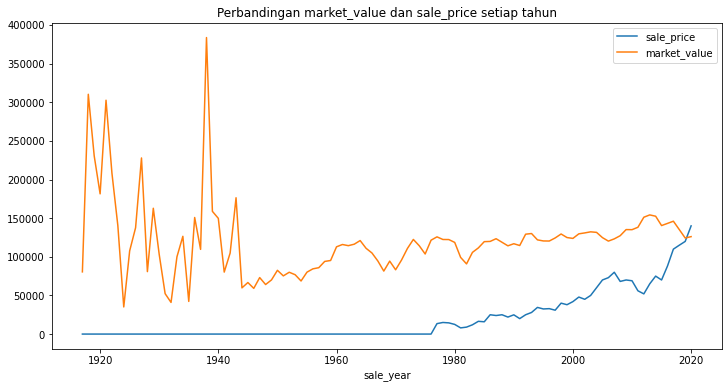

In [ ]:
# Plot nilai median sale_price dan market_value
df_prop.groupby(by='sale_year').median()[['sale_price','market_value']].plot(figsize=(12,6))
plt.title('Perbandingan market_value dan sale_price setiap tahun');

Data diatas menunjukan adanya ketidaksesuaian antara nilai sale_price dengan market_value-nya untuk setiap properti, terutama untuk di tahun-tahun di bawah tahun 1977 dimana nilai sale_price masih bernilai mendekati nol, hal ini bisa saja dikarenakan pada tahun-tahun tersebut tidak ditemukannya data mengenai penjualan properti tersebut. sale_price merupakan salah satu faktor yang penting dalam menentukan market_value, karena harga jual-beli suatu properti menentukan nilai properti tersebut. Oleh karena itu, data sale_price yang bernilai mendekati 0 dinyatakan invalid dan tidak akan dimasukkan kembali dalam analisis selanjutnya.

In [ ]:
#Filtering data sale_year >=1977
df_prop = df_prop[df_prop['sale_year']>=1977]

## 2. Distribusi Market Value



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


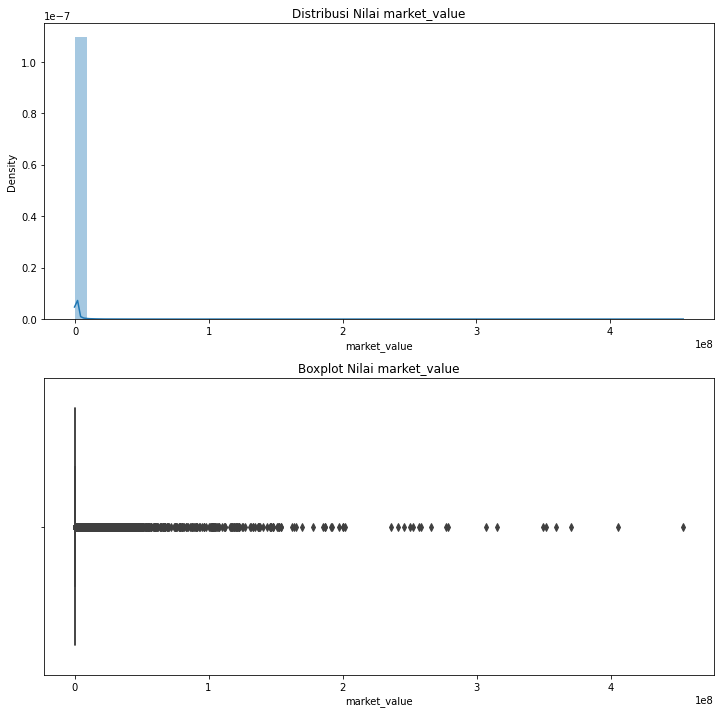

In [ ]:
# Plot distribusi nilai market_value dan boxplotnya
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(df_prop['market_value'])
plt.title('Distribusi Nilai market_value');
plt.subplot(2,1,2)
sns.boxplot(df_prop['market_value'])
plt.title('Boxplot Nilai market_value');

In [ ]:
# Melihat nilai deskriptif market_value
df_prop['market_value'].describe()

count    5.379310e+05
mean     2.808377e+05
std      2.834964e+06
min      0.000000e+00
25%      7.040000e+04
50%      1.308000e+05
75%      2.177000e+05
max      4.541974e+08
Name: market_value, dtype: float64

Berdasarkan plot diatas dapat dilihat bahwa terdapat banyak nilai outlier pada fitur market_value, yang menyebabkan grafik distribusi nilai market_value tidak tampak jelas. Dari data deskripsi juga dapat dilihat bahwa nilai maksimal market_value mencapai 45.4197.400 USD, berbeda sangat jauh dari mean (280.837,7 USD) dan median (130.800 USD). Namun nilai outlier ini belum tentu merupakan nilai anomali, bisa jadi dikarenakan fitur yang dimiliki properti tersebut memang menghasilkan harga yang sangat mahal contonya yang tergolong spesial properti seperti stadiun. Untuk memastikan hal tersebut maka diperlukan analisa data lebih lanjut.

In [ ]:
# Mendapatkan index outlier market_value
var_dep = 'market_value'

q1 = df_prop[var_dep].describe()['25%']
q3 = df_prop[var_dep].describe()['75%']
iqr = q3 - q1

outlier_index = df_prop[(df_prop[var_dep] < q1 - (1.5 * iqr)) | (df_prop[var_dep]> q3 + (1.5 *iqr)) ].index

df_prop_outlier_out = df_prop.drop(outlier_index)

In [ ]:
print('Jumlah data outlier yang dihapus adalah', round(((df_prop.shape[0] - df_prop_outlier_out.shape[0])/df_prop.shape[0])*100,2), '%')

Jumlah data outlier yang dihapus adalah 7.77 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


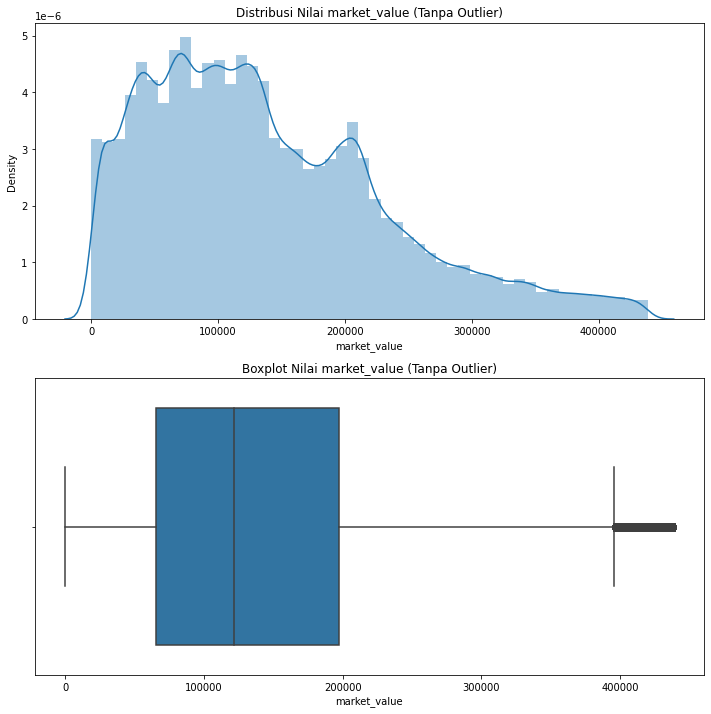

In [ ]:
# Plot distribusi nilai market_value dan boxplotnya tanpa nilai outlier
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(df_prop_outlier_out['market_value'])
plt.title('Distribusi Nilai market_value (Tanpa Outlier)''');
plt.subplot(2,1,2)
sns.boxplot(df_prop_outlier_out['market_value'])
plt.title('Boxplot Nilai market_value (Tanpa Outlier)''');

In [ ]:
# Melihat nilai deskriptif market_value tanpa nilai-nilai outlier
df_prop_outlier_out['market_value'].describe()

count    496124.000000
mean     139195.482581
std       94821.331328
min           0.000000
25%       65800.000000
50%      121500.000000
75%      197700.000000
max      438600.000000
Name: market_value, dtype: float64

Data yang tergolong outlier berdasarkan nilai market_value adalah 7.77%. Berdasarkan hasil filtering data outlier dengan menggunakan metode quartil barulah terlihat jelas distribusi fitur market_value. Berdasarkan data statistik deskriptif masih terdapat nilai anomali yaitu minimum value Nol. Rerata data yang sebelumnya 280.837,7 USD menjadi 139.195 USD, median yang sebelumnya 130.800 USD menjadi 121.500 USD dan nilai maksimum tidak terlampau jauh (438.600 USD, sebelumnya 45.4197.400 USD). Berdasarkan plot distribusi market_value dapat dilihat bahwa harga cenderung condong ke kanan.

## 3. Tipe Property di Kota Philadelphia berdasarkan Category

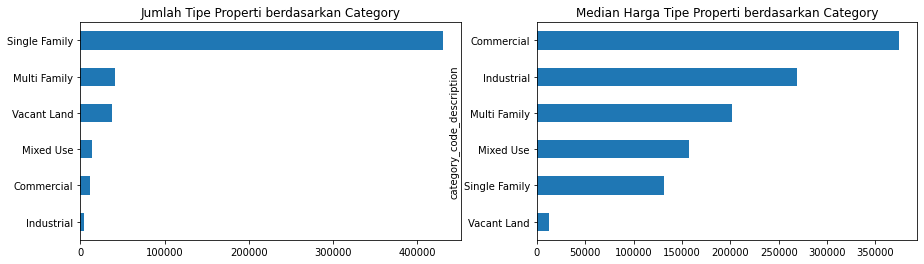

In [ ]:
# Plot jumlah properti dan nilai market_valuenya berdasarkan kategori
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_prop['category_code_description'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Jumlah Tipe Properti berdasarkan Category');
plt.subplot(1,2,2)
df_prop.groupby(by='category_code_description').median()['market_value'].sort_values(ascending=True).plot(kind='barh')
plt.title('Median Harga Tipe Properti berdasarkan Category');

Kategori properti yang paling banyak di Philadelphia adalah properti dengan kategori Single Family sebanyak 430.014 USD diikuti oleh kategori Multi Family dan kategori Vacant_land. Hal ini menunjukan bahwa mayoritas properti di Philadelphia merupakan perumahan masyarakat.

Sedangkan berdasarkan market_value-nya kategori Commercial memiliki median harga tertinggi yaitu 374.850 USD, diikuti kategori Industrial dan kategori Multi Family. Hal ini tentunya wajar dikarekan daerah komersil dan industri memiliki potensi yang besar untuk berbisnis.

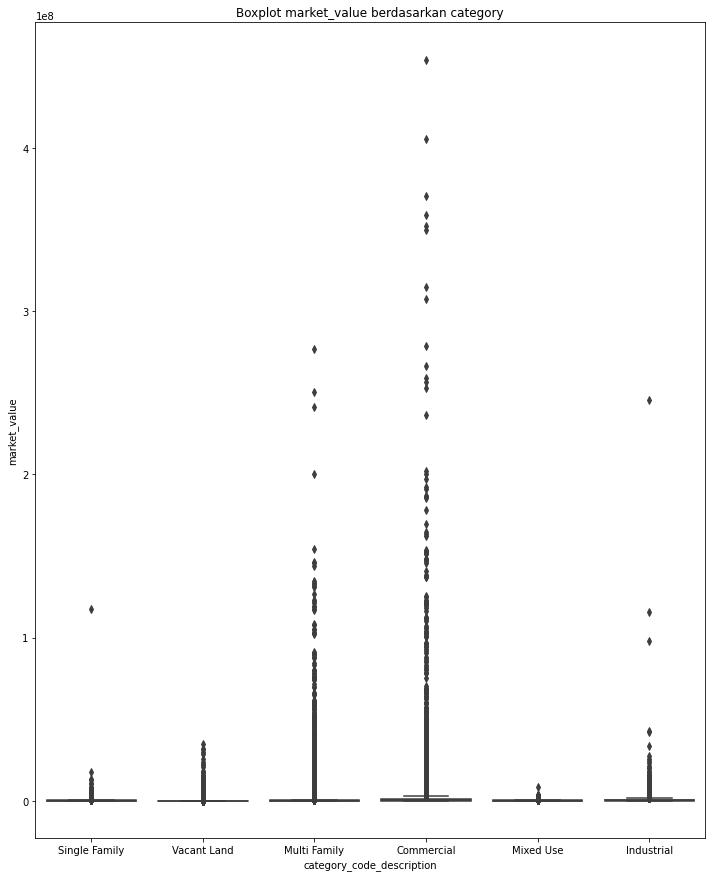

In [ ]:
plt.figure(figsize=(12,15))
plt.subplot(1,1,1)
sns.boxplot(data=df_prop, x='category_code_description', y='market_value')
plt.title('Boxplot market_value berdasarkan category');

Plot diatas menampilkan boxplot dari nilai market_value berdasarkan setiap kategori. Terlihat bahwa masing-masing kategori tidak dapat memperlihatkan bentuk boxplot yang jelas, hal ini dikarenakan banyaknya nilai-nilai yang tergolong outlier pada data. Terlihat bahwa properti dengan tipe commercial memiliki nilai-nilai outlier yang tinggi daripada properti dengan kategori lain, hal ini wajar karena sifat properti kategori tersebut yang memiliki nilai bisnis. Selain itu terlihat bahwa kategori vacant_land dan mixed_use harga cenderung lebih rendah.

## 4. Tipe Property di Kota Philadelphia berdasarkan Zoning

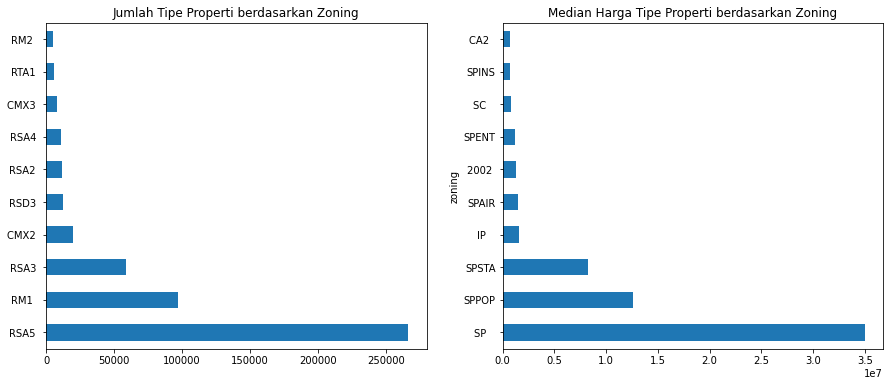

In [ ]:
# # Plot jumlah properti dan nilai market_valuenya berdasarkan Zoning
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df_prop['zoning'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Jumlah Tipe Properti berdasarkan Zoning');
plt.subplot(1,2,2)
df_prop.groupby(by='zoning').median()['market_value'].sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Median Harga Tipe Properti berdasarkan Zoning');

Berdasarkan plot diatas tipe rumah dengan jumlah paling banyak berdasarkan zoning adalah:
1. RSA5 dan RSA3 (Residential Single-Family Attached) sebanyak 266479 dan 58477 buah
2. RM1 (Residential Multi-Family) sebanyak 96719 buah
3. CMX2 (Neighborhood Commercial Mixed-Use) sebanyak 19694 buah
4. RSD3 (Residential Single-Family Detached) sebanyak 12183

Menunjukan bahwa mayoritas properti di Philadelphia adalah tipe Residential (perumahan) dan diikuti dengan tipe Commersial.

Sedang properti dengan median harga yang paling tinggi adalah:
1. SP (Special Purpose, ex: Institutional, Stadium, Entertaniment, Park and Open Space) sebesar 35.000.000 USD
2. Port Industrial sebesar 1.622.200 USD

Tentunya harga properti dengan tipe SP (Special Purpose) jauh lebih mahal dibandingkan dengan tipe Residential atau Commersial, contohnya saja pembangunan Stadium (SP-STA) membutuhkan biaya yang lebih besar dibandingkan dengan pembangunan peruamahan (RSA).

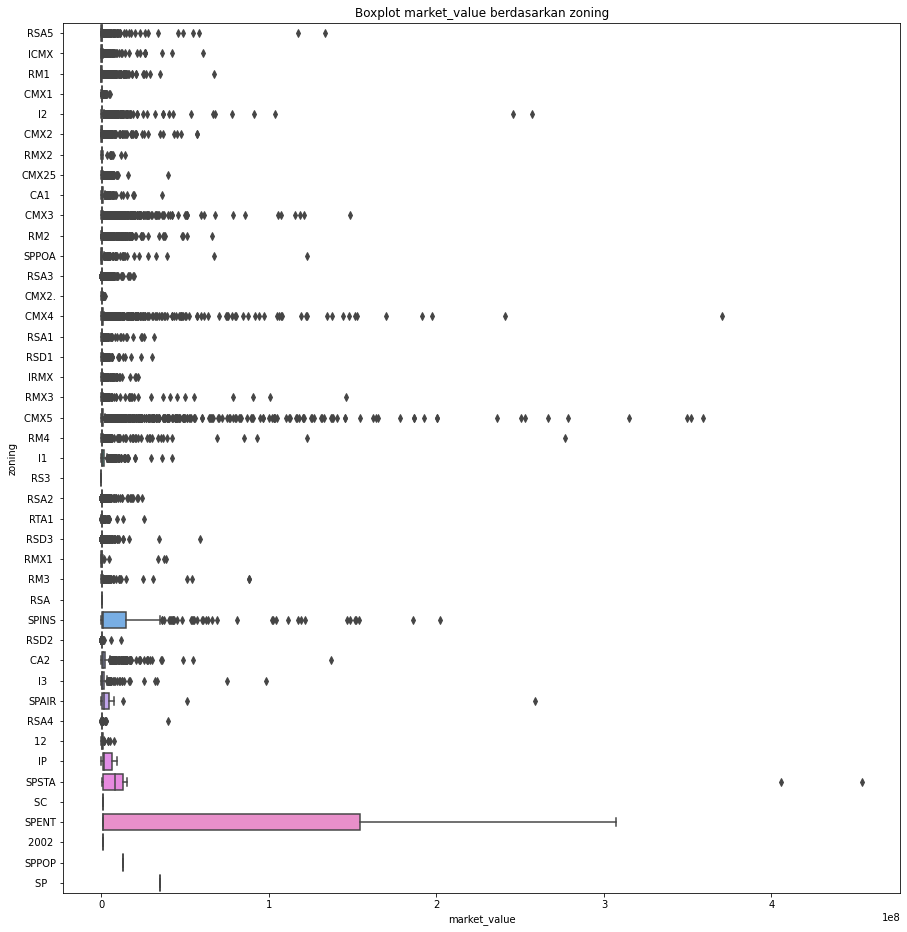

In [ ]:
# Boxplot nilai properti berdasarkan zoning
plt.figure(figsize=(15,16))
plt.subplot(1,1,1)
sns.boxplot(data=df_prop, x='market_value', y='zoning')
plt.title('Boxplot market_value berdasarkan zoning');

Data persebaran nilai properti untuk berdasarkan zoning tampak tidak begitu jelas, hal ini disebabkan banyaknya nilai-nilai yang tergolong outlier.

## 5. Jumlah ruangan dan stories properti

In [ ]:
# Jumlah ruangan properti di Philadelphia
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
pd.DataFrame(pd.cut(df_prop['number_of_rooms'], bins).value_counts().sort_index())

,number_of_rooms
"(0, 10]",329568
"(10, 20]",2349
"(20, 30]",56
"(30, 40]",7
"(40, 50]",2
"(50, 60]",2
"(60, 70]",2
"(70, 80]",3
"(80, 90]",3


Berdasarkan data diatas dapat dilihat bahwa mayoritas properti di Philadelphia memiliki jumlah 0-10 ruangan. Terdapat juga beberapa properti yang memiliki ruangan lebih dari 50 ruangan. Properti yang memiliki jumlah ruangan yang banyak bisa jadi berupa hotel atau apartemen.

In [ ]:
# Plot rerata banyak ruangan properti berdasarkan kategori
df_prop.groupby(by='category_code_description').mean()[['number_of_rooms','number_of_bathrooms','number_of_bedrooms']].apply(lambda x: round(x))

,number_of_rooms,number_of_bathrooms,number_of_bedrooms
category_code_description,,,
Commercial,0.0,0.0,0.0
Industrial,0.0,0.0,0.0
Mixed Use,1.0,0.0,1.0
Multi Family,2.0,1.0,1.0
Single Family,5.0,1.0,2.0
Vacant Land,0.0,0.0,0.0


Data diatas menunjukan rerata jumlah ruangan untuk masing-masing kategori. Terlihat bahwa properti dengan kategori komersial dan industrial rerata tidak memiliki ruangan, hal ini tentunya wajar karena properti dengan kategori tersebut untuk keperluan bisnis.
Sedangkan untuk Single Family dan Multi Family terlihat bahwa rerata jumlah ruangan masing-masing adalah 5 dan 2 ruangan dengan 1 kamar mandi dan 2 kamar tidur untuk Single Family, 1 kamar tidur untuk Multi Family.

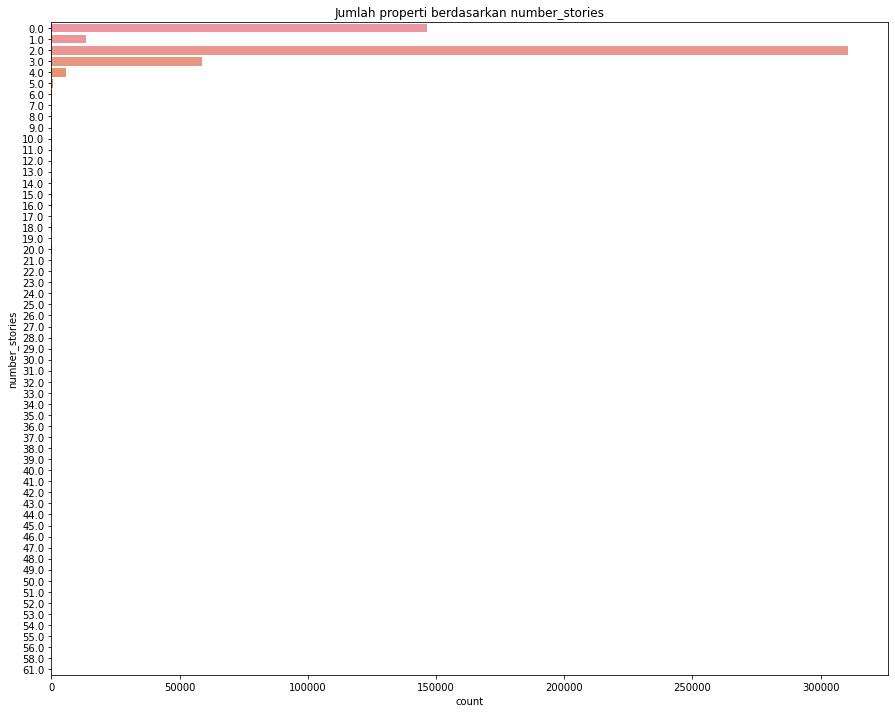

In [ ]:
# Jumlah stories properti di Philadelphia
plt.figure(figsize=(15,12))
sns.countplot(data=df_prop, y='number_stories')
plt.title('Jumlah properti berdasarkan number_stories');

Dari plot diatas didapatkan rerata properti di Philadelphia memiliki jumlah stories antara 0-4 dengan detail berikut.
1. 0 story = 146394 properti
2. 1 story = 13507 properti
3. 2 stories = 310845 properti
4. 3 stories = 58845 properti
5. 4 stories = 5527	properti

Beberapa properti memiliki stories hingga 61 stories dapat merupakan properti seperti perkantoran ataupun apartemen.

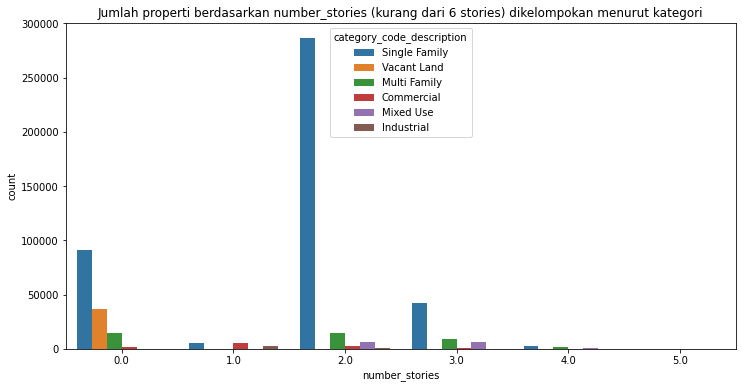

In [ ]:
# Melihat kategori jumlah stories 0-5
plt.figure(figsize=(12,6))
sns.countplot(data=df_prop[df_prop['number_stories']<=5], x='number_stories', hue='category_code_description')
plt.title('Jumlah properti berdasarkan number_stories (kurang dari 6 stories) dikelompokan menurut kategori');

Melalui plot diatas terlihat bahwa mayoritas properti dengan kategori single family memiliki 0,2 dan 3 stories. Untuk vacant land tentunya tidak memiliki stories sehingga paling banyak bernilai 0. Sedangkan properti yang terkategori industrial dan komersil memiliki stories antara 1-3

## 6. Korelasi antara Feature dengan Market Value

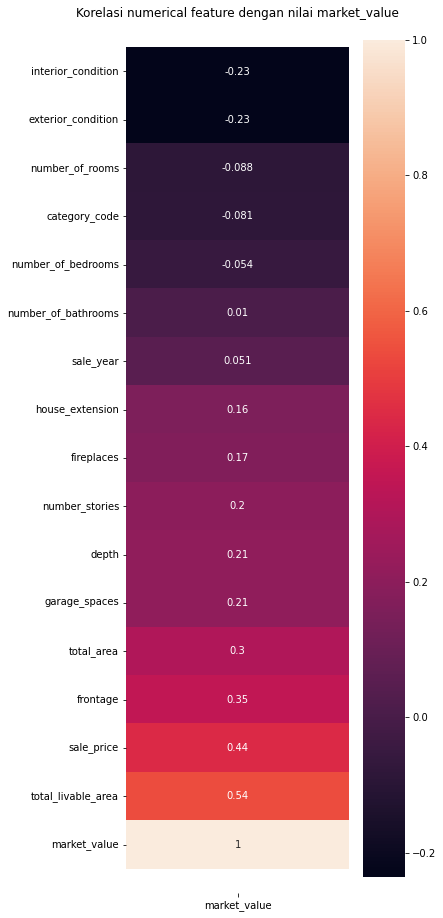

In [ ]:
# Plot korelasi antar fitur dengan market_value (dependent variable)
plt.figure(figsize=(5,16))
ax = sns.heatmap(df_prop.corr(method='spearman')[['market_value']].sort_values(by='market_value'), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Korelasi numerical feature dengan nilai market_value');

Berdasarkan plot diatas beberapa fitur numerikal yang berkorelasi tinggi terhadap nilai properti adalah:
1. total_livable_area (0.54)
2. sale_price (0.44)
3. frontage (0.35)
4. total_area (0.30)

Terlihat bahwa interior_condition dan exterior_condition juga memiliki korelasi yang cukup baik, tetapi bernilai negatif, hal ini dikarenakan kedua fitur tersebut mengurutkan nilai terbaik dari 1 hingga terburuk 9.

# **Data Cleaning**

Setelah penghapusan fitur yang tidak relevan, terlalu banyak missing value, dan beberapa alasan lain yang telah dijelaskan sebelumnya, akan dilanjutkan proses data cleaning berikutnya. Dataset yang sudah bersih akan digunakan untuk proses analisis lebih lanjut. Pada tahap data cleaning ini, akan dilakukan :
 - Jika terdapat kesalahan tipe data, akan diubah ke tipe yang seharusnya.
 - Menghapus fitur yang tidak memiliki relevansi terhadap masalah yang sedang dihadapi.
 - Menambahkan fitur atau manipulasi fitur yang kemungkinan memiliki relevansi terhadap masalah yang sedang dihadapi.
 - Jika terdapat missing value, akan dilakukan treatment yang sesuai (Drop fitur, imputasi dengan nilai yang sesuai, drop data, etc).

**Menghapus data sale_year, sale_price, dan market_value yang bersifat nan**

Nilai NaN pada sale_price dan market_value

In [ ]:
# Melihat jumlah market_value yang bernilai 0

df_prop[df_prop['market_value'] == 0]['market_value'].count()

147

In [ ]:
# Melihat jumlah sale_price yang bernilai 0

df_prop[df_prop['sale_price'] == 0]['sale_price'].count()

11

In [ ]:
# Melihat data sale_price yang bernilai 1

df_prop[df_prop['sale_price'] == 1]['sale_price'].count()

126645

Data di atas menunjukkan bahwa terdapat properti yang memiliki market_value dan sale_price yang bernilai 0. Selain itu, juga terdapat properti dengan nilai 1. Berdasarkan methodology dari OPA, Properti-properti tersebut dianggap sebagai data yang invalid dan tidak akan digunakan dalam membangun model selanjutnya.

In [ ]:
# Menghapus data market_value yang bernilai 0

df_prop = df_prop[df_prop['market_value'] != 0]

In [ ]:
# Menghapus data sale_price yang bernilai 0

df_prop = df_prop[df_prop['sale_price'] != 0]

In [ ]:
# Menghapus data sale_price yang bernilai 1

df_prop = df_prop[df_prop['sale_price'] != 1]

In [ ]:
info_detail(df_prop)

,dataFeatures,dataType,null,nullPct,unique
0,basements,object,171162,41.62,11
1,category_code,int64,0,0.00,6
2,category_code_description,object,0,0.00,6
3,depth,float64,0,0.00,17300
4,exterior_condition,float64,14748,3.59,8
5,fireplaces,float64,4,0.00,7
6,frontage,float64,0,0.00,10620
7,garage_spaces,float64,4,0.00,57
8,garage_type,object,31467,7.65,7
9,house_extension,int64,0,0.00,99


**Missing Value**

**1. basements**

Dari info diatas menunjukkan bahwa fitur basements memiliki 41,62% null value. Namun setelah dilakukan pengecekan data, ternyata banyak nilai NaN pada properties dengan category_code = 6. category_code 6 merupakan Vacant Land (Tanah kosong), sehingga diasumsikan bahwa Vacant land tidak memiliki basements. 

Oleh sebab itu, maka fitur basements dengan basements value NaN dan category_code value 6 akan diganti valuenya menjadi 0.

Demikian juga dengan properties dengan garage_type = A. garage_type A adalah properti dengan tipe garasi basement / built-in. Sehingga, fitur basements dengan basements value NaN dan garage_type value A akan diganti valuenya dengan H, yang berarti basement partial tanpa diketahui apakah pembangunannya sudah selesai atau belum.

In [ ]:
df_prop['basements'].unique()

array(['D', '0', nan, 'C', 'A', 'E', 'H', 'G', 'I', 'B', 'J', 'F'],
      dtype=object)

In [ ]:
df_prop['basements'].isna().sum()

171162

In [ ]:
df_prop['basements'] = np.where((df_prop['basements'].isna()) & (df_prop['garage_type'] == 'A'), 'H', df_prop['basements'])

In [ ]:
df_prop['basements'] = np.where((df_prop['basements'].isna()) & (df_prop['category_code'] == 6), 'O', df_prop['basements'])

In [ ]:
df_prop['basements'] = np.where((df_prop['basements'] == '0'), 'O', df_prop['basements'])

Feature 'basement' memiliki value yang terdiri dari:
* 0: None
* A: Full Finished
* B: Full Semi-Finished
* C: Full Unfinished
* D: Full – Unknown Finish
* E: Partial Finished
* F: Partial Semi-Finished
* G: Partial Unfinished
* H: Partial - Unknown Finish
* I: Unknown Size - Finished
* J: Unknown Size - Unfinished

Untuk mempermudah pemodelan, maka nilai pada feature ini akan digabungkan menjadi:
1. None (0)
1. Full
1. Partial
1. Unknown

In [ ]:
df_prop['basements'] = np.where((df_prop['basements'] == 'A') | (df_prop['basements'] == 'B') | (df_prop['basements'] == 'C') | (df_prop['basements'] == 'D'), 'Full', df_prop['basements'])
df_prop['basements'] = np.where((df_prop['basements'] == 'E') | (df_prop['basements'] == 'F') | (df_prop['basements'] == 'G') | (df_prop['basements'] == 'H'), 'Partial', df_prop['basements'])
df_prop['basements'] = np.where((df_prop['basements'] == 'I') | (df_prop['basements'] == 'J'), 'Unknown', df_prop['basements'])

In [ ]:
df_prop['basements'].unique()

array(['Full', 'O', 'Partial', 'Unknown', nan], dtype=object)

Selanjutnya, nilai nan  pada feature ini dianggap sebagai 'none' (tidak memiliki basements) dan akan diinput dengan O pada proses pre-processing data.

**2. exterior_condition**

Fitur exterior condition memiliki 3.59% null value. Setelah diamati datanya, terdapat value exterior_condition NaN pada properties dengan category_code = 6. Sehingga, fitur exterior_condition dengan value NaN dan category_code value 6 akan diganti valuenya dengan exterior_condition 0

In [ ]:
df_prop['exterior_condition'].unique()

array([ 2.,  4.,  0.,  3.,  1.,  5., nan,  6.,  7.])

In [ ]:
df_prop['exterior_condition'] = np.where(df_prop['exterior_condition'].isna(), np.nan, df_prop['exterior_condition'])

In [ ]:
df_prop['exterior_condition'] = np.where((df_prop['exterior_condition'].isna()) & (df_prop['category_code'] == 6), 0.0, df_prop['exterior_condition'])

Selanjutnya, nilai nan pada feature ini akan diinput dengan 0 yang berarti unknown pada tahap pre-processing.

**3. garage_type**

Pada fitur garage_type juga ditemui 7.65% null value. Sehingga, fitur garage_type dengan value NaN dan category_code value 6 akan diganti valuenya dengan garage_type 0.

In [ ]:
df_prop['garage_type'].unique()

array(['0', 'A', nan, 'B', 'C', 'F', 'T', 'S'], dtype=object)

In [ ]:
df_prop['garage_type'] = np.where(df_prop['garage_type'] == 'nan', np.nan, df_prop['garage_type'])

In [ ]:
df_prop['garage_type'] = np.where((df_prop['garage_type'].isna()) & (df_prop['category_code'] == 6), 'O', df_prop['garage_type'])

In [ ]:
df_prop['garage_type'] = np.where((df_prop['garage_type'] == '0'), 'O', df_prop['garage_type'])

Selanjutnya, nilai nan pada feature ini akan diinput dengan 'O' yang berarti none pada tahap pre-processing.

**4. interior_condition**

Fitur interior_condition memiliki 3.69% null value. Setelah diamati datanya, terdapat value interior_condition NaN pada properties dengan category_code = 6. Sehingga, fitur interior_condition dengan value NaN dan category_code value 6 akan diganti valuenya dengan interior_condition 0

In [ ]:
df_prop['interior_condition'].unique()

array([ 2.,  4.,  0.,  3.,  1.,  5., nan,  6.,  7.])

In [ ]:
df_prop['interior_condition'] = np.where((df_prop['interior_condition'].isna()) & (df_prop['category_code'] == 6), 0.0, df_prop['interior_condition'])

Selanjutnya, nilai nan pada feature ini akan diinput dengan 0 yang berarti unknown pada tahap pre-processing.

**5. number_of_bathrooms, bedrooms, rooms, stories**

Kemudian untuk total kamar mandi, kamar, ruangan, dan tingkat dengan value NaN akan diganti dengan value 0, karena diasumsikan tidak memiliki ruangan tersebut. Value Nan pada kolom ini akan ditangani dengan imputer pada proses pre-processing selanjutnya.


**6. other_building**

Other building dengan value NaN akan diganti dengan value N , karena diasumsikan tidak memiliki bangunan lain. Value Nan pada kolom ini akan ditangani dengan imputer pada proses pre-processing selanjutnya.


In [ ]:
df_prop['other_building'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [ ]:
df_prop['other_building'].isna().sum()

410477

**7. separate_utilities**

Other building dengan value NaN akan diganti dengan value O , karena diasumsikan tidak utilities yang terpisah. Value Nan pada kolom ini akan ditangani dengan imputer pada proses pre-processing selanjutnya.


In [ ]:
df_prop['separate_utilities'].unique()

array([nan, 'A', 'B', 'C'], dtype=object)

In [ ]:
df_prop['separate_utilities'].isna().sum()

392160

**8. street_designation**

kolom ini menggambarkan bagian dari nama jalan yang menjelaskan tipe dari jalan tersebut.

Keterangan:
* ST = Street (Jalan umum di perkotaan, terutama jalan beraspal dengan jalan setapak dan bangunan di satu atau kedua sisinya.)
* AVE = Avenue (Jalan lebar, biasanya ditanami pohon di setiap sisinya.)
* SQ = Square (Jalan yang membatasi keempat sisi suatu kawasan yang akan digunakan sebagai ruang terbuka atau sekelompok bangunan.)
* TER = Terrace (Jalan raya biasanya dengan rumah-rumah di kedua sisinya ditinggikan di atas permukaan jalan)
* WAY = WAY (Jalan raya dengan akses terbatas yang digunakan terutama oleh pejalan kaki.)
* CT = Court (Jalan pendek, tertutup.)
* CIR = Circus (bundaran besar)
* PK = Park (Taman)
* PKY = Parkway (Jalan melalui taman atau area padang rumput terbuka.)
* PLZ = Plaza (Jalan yang melingkupi keempat sisi suatu kawasan membentuk pasar atau ruang terbuka)
* LN = Lane (Jalan sempit antara tembok, bangunan atau jalan desa atau kota yang sempit.)
* MEW = Mews (Jalan di sekelompok rumah.)
* ALY = Alley (Biasanya jalan sempit di kota-kota besar atau kecil, seringkali melalui blok kota atau alun-alun.)
* WLK = Walk (Jalan raya dengan akses terbatas yang digunakan terutama oleh pejalan kaki.)
* ML = Mill (Daerah pabrik)
* HTS = Heights (daerah ketinggian)
* PTH = Path (Jalan raya hanya digunakan untuk lalu lintas pejalan kaki.)
* ROW = Row (jalan perumahan)
* EXP = Expressway (jalan tol)
* WHRF = Wharf (Jalan raya di dermaga)



In [ ]:
df_prop['street_designation'].unique()

array(['ST ', 'AVE', 'TER', 'CT ', 'WAY', 'SQ ', 'BLV', 'PKY', 'LA ',
       'RD ', 'ALY', 'WLK', 'MEW', 'PL ', 'CIR', 'PK ', 'DR ', 'HTS',
       'ML ', 'ROW', 'PLZ', 'LN ', 'PTH', nan], dtype=object)

In [ ]:
df_prop['street_designation'].isna().sum()

1

Berdasarkan keterangan di atas, dapat dilihat bahwa tidak terdapat value yang aneh pada feature 'street_designation', namun feature tersebut memiliki 1 data kosong. Berdasarkan data street_name, didapatkan bahwa data kosong tersebut merupakan pelabuhan (wharf), maka data nan tersebut akan diinput dengan 'whrf' dengan imputer pada tahap pre-processing selanjutnya.

**9. Topography**

In [ ]:
df_prop['topography'].unique()

array(['F', 'E', nan, 'A', 'D', 'C', 'B', '0'], dtype=object)

In [ ]:
df_prop['topography'] = np.where((df_prop['topography'] == '0'), 'O', df_prop['topography'])

In [ ]:
df_prop['topography'].value_counts()

F    354413
A     21879
E      3554
B       184
C       117
D        89
O        21
Name: topography, dtype: int64

In [ ]:
df_prop['topography'].isna().sum()

30991

Berdasarkan metadata dari data properties, Feature 'topography' merupakan feature yang menggambarkan keadaan tofografi suatu properti yang terdiri dari nilai kategorik berupa angka dari A-F. Mayoritas properti yang ada di Kota Philadelphia berada 'street level' (F). Oleh karena itu, data Nan pada feature ini akan diisi dengan 'F' dengan imputer pada proses pre-processing selanjutnya.

**10. total_area**

In [ ]:
df_prop['total_area'].describe()

count    4.112480e+05
mean     3.214436e+03
std      3.263823e+04
min      0.000000e+00
25%      8.700000e+02
50%      1.277900e+03
75%      2.034760e+03
max      1.084644e+07
Name: total_area, dtype: float64

In [ ]:
df_prop['total_area'][df_prop['total_area'] == 0].count()

30076

In [ ]:
df_prop['total_area'][(df_prop['total_area'] < 5) & (df_prop['total_area'] != 0)].count()

19

Berdasarkan keterangan di atas, dapat dilihat terdapat data dengan feature 'total_area' yang bernilai 0, dimana tidak mungkin terdapat luas tanah sebesar 0. Sama halnya dengan data 'total_area' yang bernilai < 5 feet square. Oleh karena itu data dengan feature 'total_area' yang bernilai 0  dan < 5 sejumlah 5886 data akan dihapus.

In [ ]:
# Menghapus data 'total_area' yang bernilai 0
df_prop = df_prop[df_prop['total_area'] != 0]

# Menghapus data 'total_area' yang bernilai kurang dari 5
df_prop = df_prop[df_prop['total_area'] >= 5]

**11. total_livable_area**

In [ ]:
df_prop[df_prop['total_livable_area'].isna()]

,basements,category_code,category_code_description,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,house_extension,interior_condition,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,separate_utilities,street_designation,topography,total_area,total_livable_area,type_heater,unfinished,view_type,year_built,zoning,sale_price,sale_date,market_value,sale_year
2619,NaN,1,Single Family,40.00,NaN,NaN,16.00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ST,NaN,640.00,NaN,NaN,NaN,NaN,NaN,RSA5,450000.0,2017-05-11 00:00:00,639400.0,2017.0
509830,NaN,2,Multi Family,119.87,NaN,NaN,21.41,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ST,NaN,2566.41,NaN,NaN,NaN,NaN,NaN,NaN,1225000.0,2016-07-18 00:00:00,1200000.0,2016.0
529827,NaN,4,Commercial,772.50,NaN,NaN,1641.66,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AVE,NaN,1268182.35,NaN,NaN,NaN,NaN,NaN,SPAIR,1974823.0,1993-06-30 00:00:00,12670300.0,1993.0


Berdasarkan data di atas, dapat dilihat terdapat 3 data nan pada total_livable area. Namun, data tersebut akan dihapus nantinya karena memiliki nilai 'year_built' = NaN.

**12. type_heater**

type_heater dengan value NaN akan diubah menjadi 0 menggunakan simple imputer.

In [ ]:
df_prop['type_heater'] = np.where((df_prop['type_heater'] == '0'), 'O', df_prop['type_heater'])

In [ ]:
df_prop['type_heater'].value_counts()

H    87728
A    67970
B    46505
G     3734
O     1285
C      827
E      514
D      328
Name: type_heater, dtype: int64

In [ ]:
df_prop['type_heater'].isna().sum()

172262

**13. unfinished**

unfinished dengan value NaN akan diubah menjadi F menggunakan simple imputer.

In [ ]:
df_prop['unfinished'].value_counts()

U    2045
Name: unfinished, dtype: int64

**14. view_type**

view_type dengan value Nan akan diubah menjadi 0 menggunakan simple imputer

In [ ]:
df_prop['view_type'] = np.where((df_prop['view_type'] == '0'), 'O', df_prop['view_type'])

In [ ]:
df_prop['view_type'].unique()

array(['I', nan, 'O', 'E', 'C', 'A', 'H', 'B', 'D'], dtype=object)

In [ ]:
df_prop['view_type'].isna().sum()

13254

**15. year_built**

In [ ]:
df_prop['year_built'].unique()

array([1920.0, 1960.0, 0.0, 1987.0, 2016.0, 2018.0, 2019.0, 2014.0,
       1924.0, 1900.0, 1854.0, 2011.0, 1955.0, 1954.0, 1929.0, 2008.0,
       2007.0, 2006.0, 1902.0, 1944.0, 1981.0, 2005.0, 2004.0, 1904.0,
       1930.0, 1965.0, 1906.0, 1915.0, 2003.0, 1991.0, 1997.0, 1990.0,
       1994.0, 2015.0, 1918.0, 1925.0, 2009.0, 2017.0, 2013.0, 2012.0,
       1948.0, 1980.0, 1931.0, 1916.0, 1940.0, 1972.0, 1905.0, 1926.0,
       1988.0, 1949.0, 1951.0, 1950.0, 1941.0, 1910.0, 1921.0, 1914.0,
       1874.0, 1936.0, 1923.0, 1932.0, 1907.0, 1935.0, 1956.0, 1927.0,
       1934.0, 1939.0, 1919.0, 1996.0, 1908.0, 1894.0, 1866.0, nan,
       2010.0, 1879.0, 1814.0, 1917.0, 1977.0, 1943.0, 1945.0, 1933.0,
       1969.0, 1946.0, 1942.0, 1896.0, 1984.0, 1970.0, 2002.0, 1890.0,
       1789.0, 1855.0, 1897.0, 2000.0, 1952.0, 2001.0, 1880.0, 1989.0,
       1903.0, 1860.0, 1840.0, 1975.0, 1999.0, 1792.0, 1912.0, 1928.0,
       1832.0, 1865.0, 1983.0, 1835.0, 1913.0, 1922.0, 1668.0, 1992.0,
       1979.

Berdasarkan data di atas, dapat dilihat bahwa terdapat beberapa kejanggalan pada value yang ada di feature 'year_built', yaitu:
* Terdapat value yang bertipe string, integer, float
* Terdapat value yang bernilai 0
* Terdapat value yang bernilai 196Y (Hal ini kemungkinan terjadi karena kesalahan input)

Oleh karena itu, beberapa hal yang akan dilakukan adalah:
* Mengubah seluruh nilai menjadi integer
* Menghapus nilai 0
* Mengganti nilai 196Y dengan 1966 (angka '6' memiliki letak yang berdekatan dengan 'Y' pada keyboard)

In [ ]:
df_prop[df_prop['year_built']=='196Y']['year_built']

36061    196Y
Name: year_built, dtype: object

In [ ]:
df_prop['year_built'].replace({'196Y':'1966'}, inplace = True)

In [ ]:
df_prop[df_prop['year_built']==0]['year_built'].count()

25948

In [ ]:
df_prop = df_prop[df_prop['year_built']!=0]

In [ ]:
df_prop['year_built'].isna().sum()

3

In [ ]:
df_prop = df_prop[df_prop['year_built'].isna()==False]

**16. zoning**

In [ ]:
df_prop['zoning'].unique()

array(['RSA5 ', 'RM1  ', 'ICMX ', 'CMX1 ', 'I2   ', 'CMX2 ', 'RMX2 ',
       'CMX25', nan, 'CMX3 ', 'CA1  ', 'RM2  ', 'SPPOA', 'RSA3 ', 'CMX2.',
       'CMX4 ', 'RSA1 ', 'RSD1 ', 'RMX3 ', 'IRMX ', 'CMX5 ', 'RM4  ',
       'I1   ', 'RS3  ', 'RSA2 ', 'RTA1 ', 'RSD3 ', 'RMX1 ', 'RM3  ',
       'RSA  ', 'SPINS', 'CA2  ', 'I3   ', 'RSA4 ', 'RSD2 ', '12   ',
       'SPSTA', 'SPAIR', 'IP   '], dtype=object)

In [ ]:
df_prop['zoning'].replace({'12   ':'I2   '}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_prop['zoning'].isna().sum()

48

In [ ]:
df_prop = df_prop[df_prop['zoning'].isna()==False]

Berdasarkan data di atas, dapat dilihat bahwa value dari 'zoning' terdiri atas kategori dan sub kategori dari zoning. Untuk meningkatkan efisiensi data, maka value pada feature ini akan dikelompokkan berdasarkan kelompoknya saja.

In [ ]:
# Menggabungkan masing-masing sub kategori ke dalam kategori yang sama
df_prop['zoning'] = np.where((df_prop['zoning'] == 'RSA5 ') | (df_prop['zoning'] == 'RSA4 ') | (df_prop['zoning'] == 'RSA3 ') | (df_prop['zoning'] == 'RSA2 ') | (df_prop['zoning'] == 'RSA1 ') | (df_prop['zoning'] == 'RSA  ') | (df_prop['zoning'] == 'RS3  '), 'RSA', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'RM4  ') | (df_prop['zoning'] == 'RM3  ') | (df_prop['zoning'] == 'RM1  ') | (df_prop['zoning'] == 'RM2  '), 'RM', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'CMX1 ') | (df_prop['zoning'] == 'CMX2 ') | (df_prop['zoning'] == 'CMX25') | (df_prop['zoning'] == 'CMX2.') | (df_prop['zoning'] == 'CMX3 ') | (df_prop['zoning'] == 'CMX4 ') | (df_prop['zoning'] == 'CMX5 '), 'CMX', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'RMX1 ') | (df_prop['zoning'] == 'RMX2 ') | (df_prop['zoning'] == 'RMX3 '), 'RMX', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'RSD1 ') | (df_prop['zoning'] == 'RSD2 ') | (df_prop['zoning'] == 'RSD3 ') , 'RSD', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'CA1  ') | (df_prop['zoning'] == 'CA2  '), 'CA', df_prop['zoning'])

# Menghapus 'spasi' di dalam nilai
df_prop['zoning'] = np.where((df_prop['zoning'] == 'RTA1 ') , 'RTA', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'I3   ') , 'I3', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'I2   ') , 'I2', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'I1   ') , 'I1', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'IP   ') , 'IP', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'ICMX ') , 'ICMX', df_prop['zoning'])
df_prop['zoning'] = np.where((df_prop['zoning'] == 'IRMX ') , 'IRMX', df_prop['zoning'])

In [ ]:
df_prop['zoning'].unique()

array(['RSA', 'RM', 'ICMX', 'CMX', 'I2', 'RMX', 'CA', 'SPPOA', 'RSD',
       'IRMX', 'I1', 'RTA', 'SPINS', 'I3', 'SPSTA', 'SPAIR', 'IP'],
      dtype=object)

In [ ]:
info_detail(df_prop)

,dataFeatures,dataType,null,nullPct,unique
0,basements,object,111200,31.31,4
1,category_code,int64,0,0.00,6
2,category_code_description,object,0,0.00,6
3,depth,float64,0,0.00,16508
4,exterior_condition,float64,0,0.00,8
5,fireplaces,float64,1,0.00,7
6,frontage,float64,0,0.00,9829
7,garage_spaces,float64,1,0.00,56
8,garage_type,object,4332,1.22,7
9,house_extension,int64,0,0.00,99


**Tipe Data**

Feature dengan tipe data yang tidak sesuai akan diubah tipe datanya agar sesuai dengan karakteristik dan kegunaan feature tersebut.

In [ ]:
df_prop = df_prop.astype({"category_code":'category'})

In [ ]:
df_prop = df_prop.astype({"year_built": 'int64'})

# **Data Preparation**

Sebelum masuk ke dalam tahap modeling, maka akan dilakukan pre-processing. Berikut adalah tahapan pre-processing yang dilakukan pada model ini:

1.   Imputer (Menangani Missing value)


* Menginput nilai nan pada kolom **fireplaces**, **garage_spaces**, **interior_condition**, dan **exterior_condition** dengan value 0
* Menginput nilai nan pada kolom **basements**, **garage_type**, **type_heater** **view_type**, dan **separate_utilities** dengan value 'O'
* Menginput nilai nan pada kolom **topography** dan **unfinished** dengan value 'F'
* Menginput nilai nan pada kolom **other_building** dengan value 'N'
* Menginput nilai nan pada kolom **street_designation** dengan value 'WHRF'

2.   Encoding

* Merubah fitur **garage_type**, **type_heater**, **view_type**, **zoning**, **street_designation**, dan **topography** menggunakan Binary Encoding, karena fitur-fitur ini memiliki unique value yang banyak sehingga akan menghasilkan jumlah kolom yang terlalu banyak apabila menggunakan OneHotEncoding.
* Merubah fitur **unfinished**, **other_building**, **basements**, **separate_utilities**, **category_code** dengan menggunakan OneHotEncoding, karena fitur memiliki unique value yang sedikit dan tidak memiliki urutan/ordinal.

3.   Scaler 

* Melakukan scaling pada fitur **depth**, **frontage**, **house_extension**, **number_of_bathrooms**, **number_of_bedrooms**, **number_of_rooms**, **number_stories**, **total_area**, **total_livable_area**, **sale_price** dengan menggunakan RobustScaler, karena fitur-fitur di atas memiliki interval yang lebar dan outlier didalamnya.



In [ ]:
# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Definisi Imputer dan Pipeline

onehot_O = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'O')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore', drop='first'))])

onehot_N = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'N')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore', drop='first'))])

onehot_F = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'F')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore', drop='first'))])

binary_O = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'O')),
    ('binary encoder', BinaryEncoder())])

binary_WHRF = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'WHRF')),
    ('binary encoder', BinaryEncoder())])

binary_F = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'F')),
    ('binary encoder', BinaryEncoder())])

impute_scaler = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 0)),
    ('scaler', RobustScaler())
])

In [ ]:
transformer = ColumnTransformer([
    ('impute_scaler', impute_scaler, ['fireplaces', 'garage_spaces']),
    ('binary_O', binary_O, ['garage_type', 'type_heater','view_type']),
    ('binary_F', binary_F, ['topography']),
    ('onehot_F', onehot_F, ['unfinished']),
    ('onehot_N', onehot_N, ['other_building']),
    ('binaryWHRF', binary_WHRF, ['street_designation']),
    ('onehot_O', onehot_O, ['basements','separate_utilities']),
    ('simpleImputer', SimpleImputer(strategy = 'constant', fill_value = 0), ['interior_condition', 'exterior_condition']),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', drop='first'), ['category_code']),
    ('binary', BinaryEncoder(), ['zoning']),
    ('scaler', RobustScaler(), ['depth', 'frontage', 'house_extension', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'total_area', 'total_livable_area', 'sale_price'])
], remainder = 'passthrough')

# **Modeling**

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_prop.drop(['market_value', 'category_code_description', 'sale_date'], axis=1)
y = df_prop['market_value']

**Train and Test Splitting**

In [ ]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

## **Choose a Benchmark Model**

Source : 
* https://medium.com/@17611104_/mengenal-random-forest-dengan-rstudio-39e9f2c0c9df
* http://learningbox.coffeecup.com/05_2_randomforest.html
* https://medium.com/about-developer-blog/xgboost-gone-wild-predicting-returns-with-extreme-gradient-boosting-3e2c16c5bc01
* https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/xgboost-HowItWorks.html
* https://devopedia.org/xgboost

1. Linear Regression

  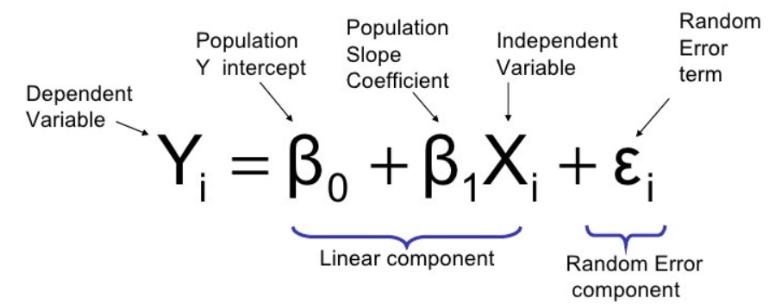

  Linear regression adalah alat statistik yang dipergunakan untuk mengetahui pengaruh antara satu atau beberapa variabel terhadap satu buah variabel. Variabel yang mempengaruhi sering disebut variabel bebas, variabel independen atau variabel penjelas. Linear regression model dibentuk berdasarkan persamaan linier y = a + bx. Karena prediksi yang dilakukan oleh regresi mengandung error, maka simple linear regression dimodelkan dengan Y = Bo + B1x + error. Bo dan B1 keduanya disebut sebagai parameter regresi. Secara lebih spesifik Bo disebut sebagai konstanta atau intersep sedangkan B1 disebut sebagai coefficient/slope/tingkat kemiringan garis regresi.

1. Random Forest

  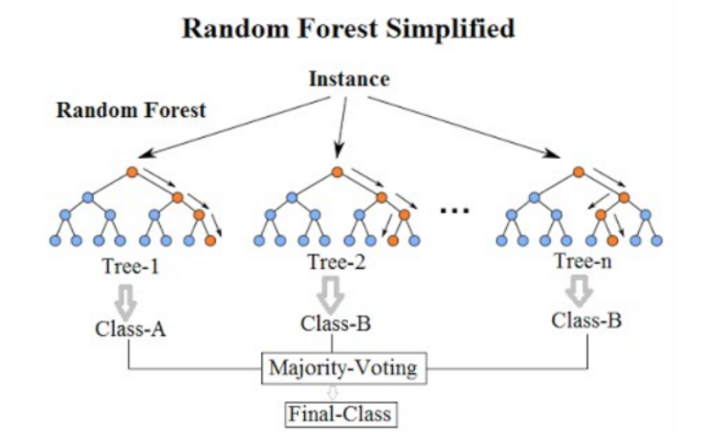

  Random forest  adalah bagging based algorithm dengan kombinasi dari  masing – masing tree yang baik kemudian dikombinasikan  ke dalam satu model. Disebut Random Forest karena dilakukan penghitungan decision tree sehingga membentuk sebuah forest.

  Cara kerja dari algoritma ini, pertama akan dipilih beberapa data di training set sebanyak K buah. Kemudian, buat decision tree dari K data yang telah dipilih sebelumnya. Pilih jumlah N-tree (kumpulan pohon-pohon) yang ingin dibuat. Ulangi langkah tersebut dan buat decision tree sebanyak-banyaknya.  Kemudian dataset yang baru akan masuk ke kelompok yang memiliki probabilitas tertinggi dari semua kombinasi N-tree.

  Jika dianalogikan, random forest adalah sekelompok sekelompok orang yang bermusyawarah untuk membuat keputusan. Masing - masing orang membuat keputusan berdasarkan pengetahuannya. Setelah semua orang membuat keputusan, hasil akhirnya akan dipilih berdasarkan voting terbanyak.

  Kelebihan metode ini adalah, Random forest dapat menghasilkan error yang lebih rendah. Dapat mengatasi data training dalam jumlah besar secara efisien. Dapat memperkirakan variabel yang penting dalam klasifikasi / regresi.

  Namun kekurangannya adalah, Random forest memiliki waktu pemrosesan yang lama karena menggunakan banyak data dan membangun banyak model tree untuk membentuk random trees menggunakan single processor.

1. XGBoost

  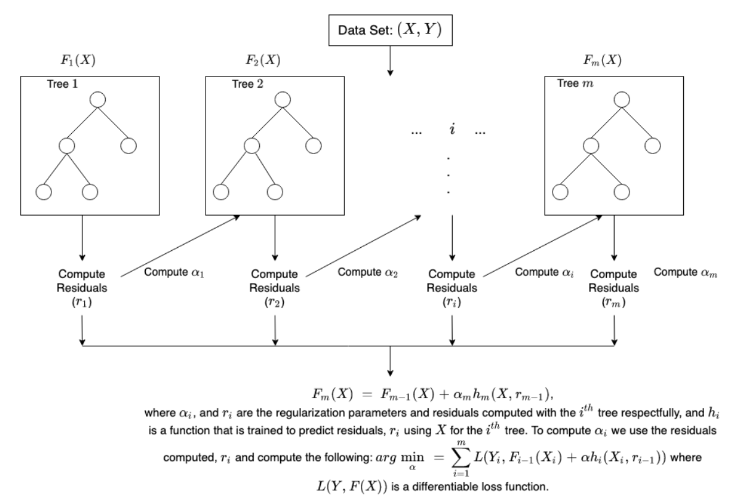

  Gradient boosting adalah algoritma supervised learning yang dapat memprediksi variabel target secara akurat dengan mengkombinasikan perkiraan satu set model yang lebih sederhana dan lemah. 

  Extreme Gradient Boosting ( XGboost ) adalah implementasi lanjutan dari algoritma Gradient Boosting. XGboost menggunakan prinsip ensemble yaitu menggabungkan beberapa set pembelajar (tree) yang lemah menjadi sebuah model yang kuat sehingga menghasilkan prediksi yang kuat. 

  XGBoost bekerja dengan cara membagi data menjadi segmen-segmen yang mengarah pada prediksi yang tepat tergantung pada berbagai parameter. Tree di XGBoost memperhitungkan nilai prediksi sebelumnya untuk titik data tertentu dan membuat tree baru yang membagi data yang ada sebaik mungkin untuk memaksimalkan 'gain' dalam prediksi. Gradient Boosted Trees menghasilkan beberapa model dengan mengambil tree sebelumnya dan memperhitungkan prediksinya untuk membuat pohon baru dengan tujuan mengurangi kesalahan prediksi. Kemudian algoritma akan menggabungkan semua prediksi pohon yang dibuat untuk menghasilkan regresi terakhir setelah dilatih. Training diulang berulang kali, menambahkan tree baru dengan kapasitas untuk meramalkan residual serta kesalahan pohon sebelumnya, yang kemudian digabungkan dengan tree sebelumnya untuk menghasilkan prediksi akhir.

  Jika dianalogikan, XGBoost adalah sekelompok orang dimana setiap orangnya mencoba menyelesaikan kesalahan yang dibuat oleh seseorang yang sebelumnya telah membuat keputusan. Kemudian mereka mencoba menemukan solusi terbaik untuk masalah tersebut.

  Kelebihan dari model ini adalah kinerja yang baik karena penanganan yang robust (kuat) untuk berbagai jenis tipe data, hubungan, distribusi, dan berbagai hyperparameter yang dapat di tune. Selain itu, eksekusinya juga cepat.


Pada tahap pemilihan benchmark model, 3 model yang akan digunakan adalah linear regression, random forest regressor, dan XGB regressor.

In [ ]:
# Define algoritma yang digunakan
lr = LinearRegression()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_rf, log_xgb]

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAPE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-9.86132390e+00 -1.38856035e+00 -4.30727043e+00 -1.07663952e+00
 -5.91302636e+14] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.20394122 -0.20223538 -0.20936558 -0.20123968 -0.20458683] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-0.23776679 -0.23834951 -0.2431974  -0.24179953 -0.23967063] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rou

In [ ]:
# Evaluasi hasil dari 3 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression','RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAPE,Std_MAPE
0,Linear Regression,-1.182605e+14,2.365211e+14
1,RandomForest Regressor,-2.042737e-01,2.810548e-03
2,XGBoost Regressor,-2.401568e-01,2.057117e-03


Berdasarkan hasil score MAPE di atas, dapat dilihat bahwa Random Forest Regressor memiliki score MAPE yang paling unggul dibandingkan dengan model lainnya sebesar 20,4% dilanjutkan dengan XGBoost Regressor sebesar 24%. Walaupun memiliki nilai MAPE yang lebih rendah, XGBoost memiliki standar deviasi MAPE yang lebih rendah yang berarti model tersebut lebih stabil.

Untuk selanjutnya, model benchmark akan diuji ke test dataset dengan menggunakan Random Forest Regressor dan XGBoost Regressor.

In [ ]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

y_pred_benchmark = {}
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred_benchmark[i] = model.predict(X_test)
    score_mape.append(mean_absolute_percentage_error(y_test,  y_pred_benchmark[i]))
    score_r2.append(r2_score(y_test,  y_pred_benchmark[i]))

score_before_tuning = pd.DataFrame({'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning

,MAPE,R2
XGB,0.361665,0.782011
RandomForest,0.238641,0.780251


Berdasarkan hasil uji model ke test set, didapatkan bahwa Random Forest memiliki nilai MAPE yang lebih baik dibandingkan XGBoost. Oleh karena itu, model random forest akan masuk ke tahap selanjutnya yaitu hyperparameter tuning.

Text(0, 0.5, 'Predicted Price')

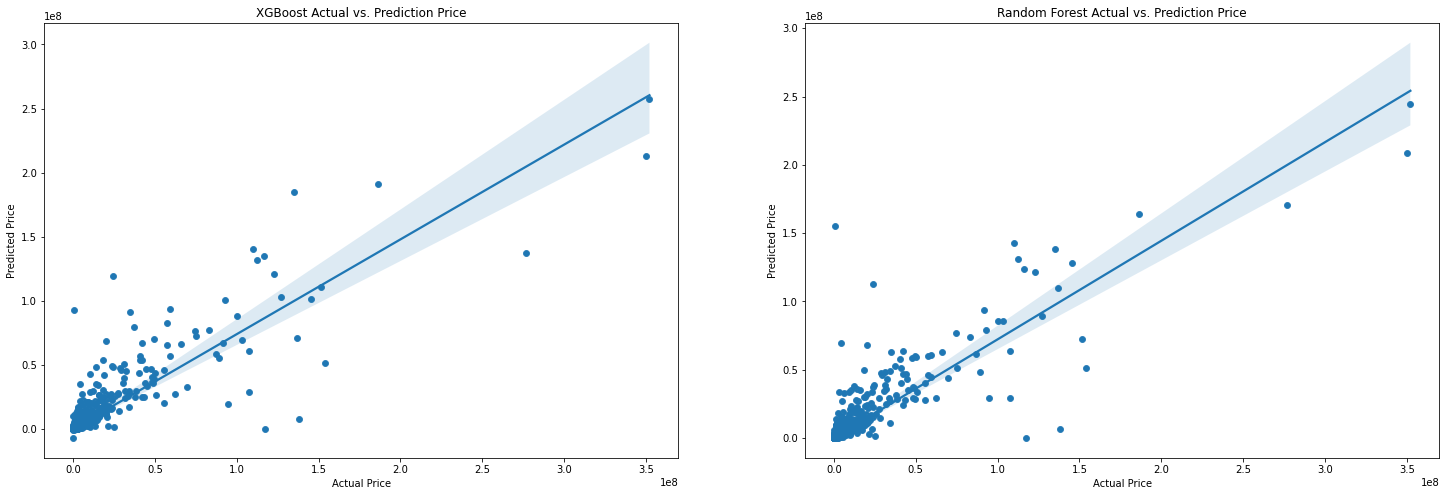

In [ ]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y = y_pred_benchmark['XGB'])
sns.regplot(x=y_test, y = y_pred_benchmark['XGB'])
plt.title('XGBoost Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y = y_pred_benchmark['RandomForest'])
sns.regplot(x=y_test, y = y_pred_benchmark['RandomForest'])
plt.title('Random Forest Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# **Hyperparameter Tuning**

Pada tahap hyperparameter tuning, model yang pertama dicoba ialah RandomForest. Namun model tersebut memerlukan waktu yang sangat lama. Sebagai alternatif, hyperparameter tuning Random Forest dilakukan menggunakan Randomized Search dengan n_iter=25. Setelah proses hyperparameter selama 23 jam, hasil parameter tersebut diuji kembali ke dataset test dan tidak menghasilkan score yang lebih baik.

Selanjutnya, hyperparameter tuning dilakukan kembali dengan model XGBoost dengan pertimbangan model XGBoost memerlukan waktu yang lebih pendek pada n_iter=50 dalam melakukan training model, yaitu selama 3 jam.

In [ ]:
# XGBOOST

# Maximum depth of a tree
max_depth = list(np.arange(2, 30))

# Step size shrinkage used in update to prevents overfitting
learning_rate = list(np.arange(1, 100)/100)

# Number of gradient boosted trees
n_estimators = list(np.arange(100, 201))

# Subsample ratio of the training instances
subsample = list(np.arange(1, 10)/10)

# Subsample ratio of columns for each level
colsample_bylevel= list(np.arange(1, 10)/10)

# L1 regularization term on weights
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__colsample_bylevel': colsample_bylevel,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Define model for hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Pipeline for algorithm chain
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1,
 #   refit = 'neg_mean_absolute_error',
    random_state = 1  
)

In [ ]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('impute_scaler',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value=0,
                                                                                                              strategy='constant')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['fireplaces',
                                                                                'garage_spaces']),
                                                                              ('binary_O',
                                                                               Pipeline(steps=[('...
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1,
                   scoring='neg_mean_absolute_percentage_error')

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1403.009188,33.847330,11.595812,1.447153,0.7,0.007743,199,27,0.28,0.9,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-0.244137,-0.236236,-0.249628,-0.242453,-0.245998,-0.243690,0.004424,1
37,246.187600,1.306330,1.501338,0.022669,0.9,10.0,194,10,0.17,0.6,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-0.282872,-0.276480,-0.285206,-0.281529,-0.290625,-0.283343,0.004629,2
2,120.930939,0.694888,5.245278,0.161036,0.8,0.059948,104,28,0.02,0.1,"{'model__subsample': 0.8, 'model__reg_alpha': ...",-0.284293,-0.282176,-0.290941,-0.288020,-0.280755,-0.285237,0.003758,3
42,288.989974,9.183707,3.160711,0.142885,0.5,0.059948,102,26,0.34,0.4,"{'model__subsample': 0.5, 'model__reg_alpha': ...",-0.280653,-0.280285,-0.283707,-0.283851,-0.301469,-0.285993,0.007879,4
9,210.453401,1.923032,2.489770,0.097735,0.3,0.16681,124,26,0.2,0.3,"{'model__subsample': 0.3, 'model__reg_alpha': ...",-0.299266,-0.298547,-0.294256,-0.293870,-0.325540,-0.302296,0.011825,5


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.24369049364506817
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 0.007742636826811269, 'model__n_estimators': 199, 'model__max_depth': 27, 'model__learning_rate': 0.28, 'model__colsample_bylevel': 0.9}


**Predict to Test with Tuned Model**

In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'MAPE': mape_xgb_tuning, 'r2': r2_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,MAPE,r2
XGB,0.231748,0.783908


**Comparison between before and after tuning**

In [ ]:
#Score XGB dan RandomForest before tuning

score_before_tuning

,MAPE,R2
XGB,0.361665,0.782011
RandomForest,0.238641,0.780251


In [ ]:
#Score XGB after tuning

score_after_tuning_xgb

,MAPE,r2
XGB,0.231748,0.783908


Berdasarkan score di atas, terlihat bahwa score XGBoost setelah tuning memiliki nilai MAPE dan R-squared yang lebih baik dibandingkan dengan XGBoost dan RandomForest sebelum tuning. Oleh karena itu, model yang dipilih untuk masuk ke tahap features importance adalah XGBoost after tuning.

# **Features Importance**

In [ ]:
def rename_features_binary(names, codes):
    newName = []
    for code in codes:
        newName.append(str(names[int(code[0])]) + str(code))

    return newName

In [ ]:
def rename_features_onehot(names, codes):
    newName = []
    for code in codes:
        newName.append(str(names[int(code[1])]) + str(code))

    return newName

In [ ]:
# Taking features
feature_1 = transformer.transformers_[0][2]
feature_2 = rename_features_binary(transformer.transformers_[1][1][0].get_feature_names_out(), transformer.transformers_[1][1][1].get_feature_names())
feature_3 = rename_features_binary(transformer.transformers_[2][1][0].get_feature_names_out(), transformer.transformers_[2][1][1].get_feature_names())
feature_4 = rename_features_onehot(transformer.transformers_[3][2], transformer.transformers_[3][1][1].get_feature_names())
feature_5 = rename_features_onehot(transformer.transformers_[4][2], transformer.transformers_[4][1][1].get_feature_names())
feature_6 = rename_features_binary(transformer.transformers_[5][1][0].get_feature_names_out(), transformer.transformers_[5][1][1].get_feature_names())
feature_7 = rename_features_onehot(transformer.transformers_[6][2], transformer.transformers_[6][1][1].get_feature_names())
feature_8 = transformer.transformers_[7][2]
feature_9 = rename_features_onehot(transformer.transformers_[8][2], transformer.transformers_[8][1].get_feature_names())
feature_10 = transformer.transformers_[9][1].get_feature_names()
feature_11 = transformer.transformers_[10][2]
feature_12 = ['year_built', 'sale_year']

c:\Users\yehez\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_names = feature_1 + feature_2 + feature_3 + list(feature_4) + list(feature_5) + feature_6 + list(feature_7) + feature_8 + list(feature_9) + feature_10 + feature_11 + feature_12
feature_names


['fireplaces',
 'garage_spaces',
 'garage_type0_0',
 'garage_type0_1',
 'garage_type0_2',
 'type_heater1_0',
 'type_heater1_1',
 'type_heater1_2',
 'type_heater1_3',
 'view_type2_0',
 'view_type2_1',
 'view_type2_2',
 'view_type2_3',
 'topography0_0',
 'topography0_1',
 'topography0_2',
 'unfinishedx0_U',
 'other_buildingx0_Y',
 'street_designation0_0',
 'street_designation0_1',
 'street_designation0_2',
 'street_designation0_3',
 'street_designation0_4',
 'basementsx0_O',
 'basementsx0_Partial',
 'basementsx0_Unknown',
 'separate_utilitiesx1_B',
 'separate_utilitiesx1_C',
 'separate_utilitiesx1_O',
 'interior_condition',
 'exterior_condition',
 'category_codex0_2',
 'category_codex0_3',
 'category_codex0_4',
 'category_codex0_5',
 'category_codex0_6',
 'zoning_0',
 'zoning_1',
 'zoning_2',
 'zoning_3',
 'zoning_4',
 'depth',
 'frontage',
 'house_extension',
 'number_of_bathrooms',
 'number_of_bedrooms',
 'number_of_rooms',
 'number_stories',
 'total_area',
 'total_livable_area',
 'sal

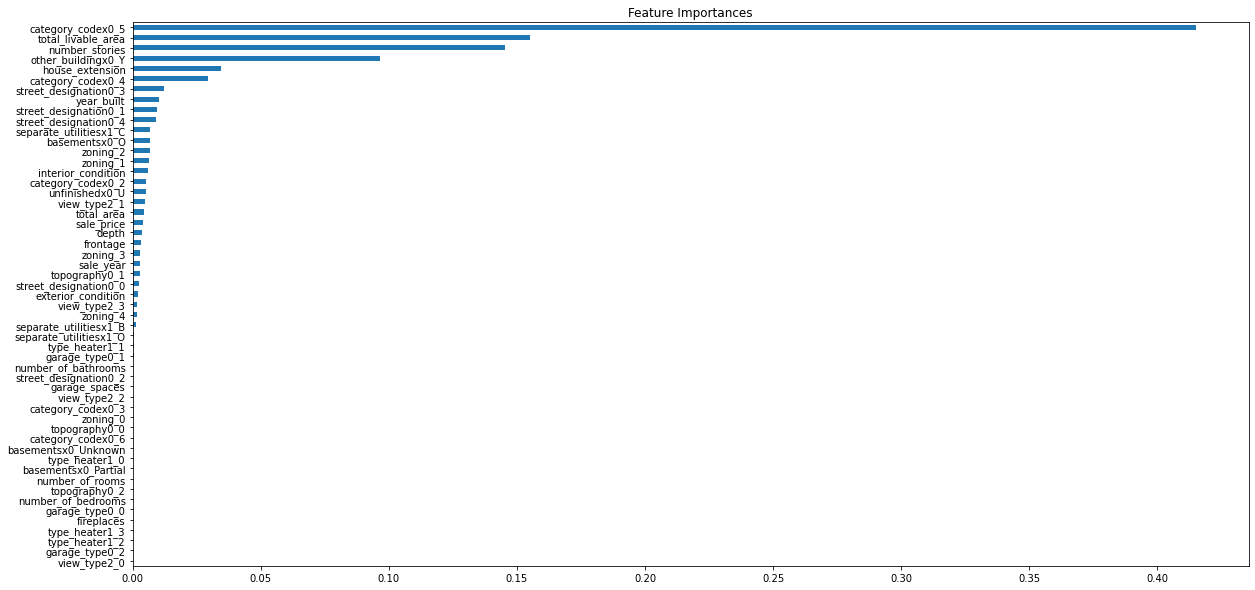

In [ ]:
# Plot feature importances untuk hyperparameter tuning
feature_imp = pd.Series(model['model'].feature_importances_, feature_names).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances', figsize=(20,10));

Dari grafik feature importances diatas, beberapa feature yang paling penting adalah category_code (x0_5) dengan nilai 0.414936, diikuti oleh total_livable_area, number_stories, dan other_building (x0_Y).

Sedangkan untuk feature yang dianggap tidak terlalu penting adalah :
1. garage_type
2. type_heater
3. fireplaces
4. number_of_bedrooms
5. number_of_rooms


Berikutnya akan dicoba menjalankan ulang model dengan feature selection.

In [ ]:
df_feature_imp = df_prop.copy()
df_feature_imp.drop(columns = ['fireplaces', 'type_heater', 'number_of_bedrooms' , 'number_of_rooms', 'garage_type'], inplace = True)
df_feature_imp.head()

,basements,category_code,category_code_description,depth,exterior_condition,frontage,garage_spaces,house_extension,interior_condition,number_of_bathrooms,number_stories,other_building,separate_utilities,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zoning,sale_price,sale_date,market_value,sale_year
1,Full,1,Single Family,49.0,2.0,15.90,0.0,0,2.0,1.0,0.0,NaN,NaN,ST,F,779.1,1203.0,NaN,I,1920,RSA,395000.0,2017-04-14 00:00:00,341600.0,2017.0
5,Full,1,Single Family,100.0,4.0,15.00,0.0,0,4.0,1.0,3.0,NaN,NaN,ST,F,1500.0,1785.0,NaN,I,1920,RSA,212000.0,2006-02-27 00:00:00,282300.0,2006.0
7,O,1,Single Family,90.0,4.0,29.17,1.0,0,4.0,2.0,2.0,NaN,NaN,ST,F,2625.3,1266.0,NaN,I,1960,RSA,130000.0,1999-03-22 00:00:00,257500.0,1999.0
8,O,1,Single Family,90.0,4.0,18.03,1.0,0,4.0,2.0,2.0,NaN,NaN,ST,F,1622.7,1266.0,NaN,I,1960,RSA,340000.0,2019-07-17 00:00:00,249400.0,2019.0
9,O,1,Single Family,90.0,4.0,18.05,1.0,0,4.0,2.0,2.0,NaN,NaN,ST,F,1624.5,1266.0,NaN,I,1960,RSA,89500.0,1980-12-15 00:00:00,249500.0,1980.0


In [ ]:
transformer_imp = ColumnTransformer([
    ('impute_scaler', impute_scaler, ['garage_spaces']),
    ('binary_O', binary_O, ['view_type']),
    ('binary_F', binary_F, ['topography']),
    ('onehot_F', onehot_F, ['unfinished']),
    ('onehot_N', onehot_N, ['other_building']),
    ('binaryWHRF', binary_WHRF, ['street_designation']),
    ('onehot_O', onehot_O, ['basements','separate_utilities']),
    ('simpleImputer', SimpleImputer(strategy = 'constant', fill_value = 0), ['interior_condition', 'exterior_condition']),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', drop='first'), ['category_code']),
    ('binary', BinaryEncoder(), ['zoning']),
    ('scaler', RobustScaler(), ['depth', 'frontage', 'house_extension', 'number_of_bathrooms', 'number_stories', 'total_area', 'total_livable_area', 'sale_price'])
], remainder = 'passthrough')

In [ ]:
# Memisahkan data independen variabel dengan target
X_select = df_feature_imp.drop(['market_value', 'category_code_description', 'sale_date'], axis=1)
y_select = df_feature_imp['market_value']

In [ ]:
# Splitting data training dan test dengan proporsi 70:30
X_select_train, X_select_test, y_select_train, y_select_test= train_test_split(
    X_select,
    y_select,  
    test_size=0.3,
    random_state=1)

In [ ]:
#Melakukan pemodelan dengan XGB after tuning terhadap feature yang telah diterapkan features selection

xgb_imp = XGBRegressor(
    random_state=1,
    subsample = 0.7, 
    reg_alpha = 0.007742636826811269, 
    n_estimators = 199, 
    max_depth = 27, 
    learning_rate = 0.28, 
    colsample_bylevel = 0.9,
)

xgb_imp_pipe = Pipeline([
    ('transformer', transformer_imp), 
    ('model', xgb_imp)])
    
xgb_imp_pipe.fit(X_select_train, y_select_train)

y_pred_xgb_imp = xgb_imp_pipe.predict(X_select_test)

# Simpan nilai metrics MAPE & r2 setelah feature selection
mape_xgb_imp = mean_absolute_percentage_error(y_select_test, y_pred_xgb_imp)
r2_xgb_imp = r2_score(y_select_test, y_pred_xgb_imp)


In [ ]:
# Melihat score model setelah dilakukan features selection

score_after_imp_xgb = pd.DataFrame({'MAPE': mape_xgb_imp, 'r2': r2_xgb_imp}, index=model.keys())
score_after_imp_xgb

,MAPE,r2
XGB,0.239831,0.788639


In [ ]:
# Membandingkan dengan score model sebelum dilakukan features selection

score_after_tuning_xgb

,MAPE,r2
XGB,0.231748,0.783908


Beberapa percobaan modeling ulang menggunakan feature selection telah dilakukan. Namun, penggunaan model XGBoost dengan hyperparameter tuning masih menjadi yang terbaik dengan score MAPE 0.231748	dan Rsquare 0.783908.

Percobaan yang telah dilakukan sebagai berikut :

| **No.** | **Drop Featues** | **MAPE Score** | **RSquare Score** |
| --- | --- | --- | --- |
| 1 | type heater, fireplaces, number_of_bedrooms, number_of_rooms | 0.241160 | 0.788057 |
| 2 | type heater, fireplaces, number_of_bedrooms, number_of_rooms, garage_type, view_type | 0.239771 | 0.775811 |
| 3 | type heater, fireplaces, number_of_bedrooms, number_of_rooms, garage_type, view_type, topography | 0.241250 | 0.778274 |
| 4 | type heater, fireplaces, number_of_bedrooms, number_of_rooms, garage_type | 0.239830 |  0.788639 |

Hasil di atas menunjukkan bahwa penerapan feature selection tidak menghasilkan score yang lebih baik. Oleh karena itu, model akhir yang dipilih adalah XGBoost after tuning tanpa melakukan feature selection.

Text(0, 0.5, 'Predicted Price')

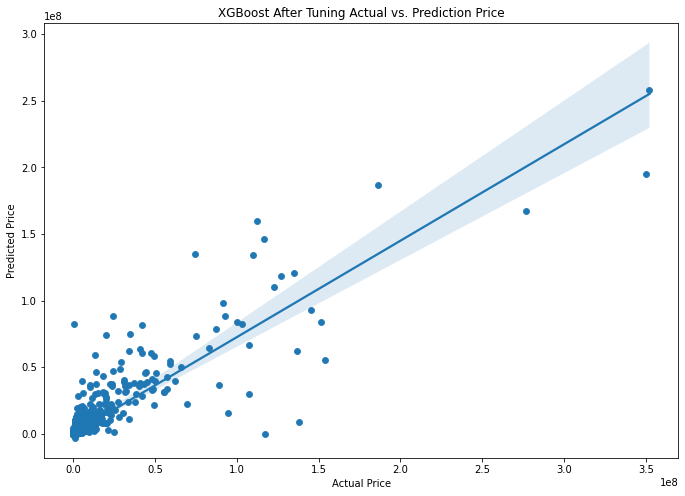

In [ ]:
# Menampilkan perbandingan antara nilai properti aktual dengan nilai properti prediksi dari model akhir (XGBoost After tuning)

plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y = y_pred_xgb_tuning)
sns.regplot(x=y_test, y = y_pred_xgb_tuning)
plt.title('XGBoost After Tuning Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# **Conclusion**

1. Properti berkategori commercial, multi family, dan industrial merupakan kategori properti yang memiliki nilai outlier terbanyak pada market_valuenya.
2. Tipe properti yang memiliki jumlah terbanyak di Kota Philadelphia adalah tipe zoning RSA (Residential Single Family) dan RMA (Residential Multifamily). Sedangkan, Tipe properti yang memiliki nilai median market_value tertinggi adalah tipe zoning special purpose.
3. Berdasarkan nilai korelasi spearman, 3 feature numerik yang memiliki korelasi tertinggi terhadap market_value adalah total_livable_area, sale_price, dan frontage. Sementara, berdasarkan model yang dibangun, 3 feature yang memiliki pengaruh paling dominan terhadap market_value adalah category_code, total_livable_area, dan number_stories.
4. Model yang telah dibangun memiliki score MAPE sebesar 23%. yang berarti ketika model yang dibuat digunakan untuk memprediksi nilai properti pada rentang nilai seperti yang dilatih terhadap model (market value: 1,300 USD - 352,143,800 USD ), maka hasil prediksi yang dihasilkan oleh model memiliki kemungkinan tingkat kesalahan sebesar 23% dari nilai aslinya. Dengan nilai MAPE sebesar 23% menjadikan model ini sebagai model yang menghasilkan nilai prediksi yang wajar.
5. Model yang telah dibangun memiliki score R-squared sebesar 78,3% yang berarti model yang telah dibangun mampu menjelaskan faktor-faktor yang mempengaruhi market_value sebesar 78,3%.


# **Recommendation**

Bagi pemerintah Kota Philadelphia:
1. Dengan nilai market_value yang telah ditentukan, maka pemerintah Kota Philadelphia dapat memprediksi pendapatan yang dihasilkan dari pajak properti pada Kota Philadelphia. Hal tersebut dapat menjadi acuan bagi pemerintah untuk membuat anggaran Kota Philadelphia  khususnya pada bidang pendidikan untuk periode selanjutnya.
2. Dengan menetapkan nilai pajak properti berdasarkan nilai market_value sebuah properti yang telah sesuai dengan keadaan setiap properti. Maka, pemerintah dapat memperkuat kebijakan terkait pembayaran pajak serta mendorong masyarakat untuk taat membayar pajak. Hal tersebut diharapkan dapat meningkatkan persentase tingkat pembayaran pajak tahunan.

Bagi OPA:
1. Berdasarkan hasil dari model yang telah dibangun. OPA dapat menjelaskan kepada masyarakat Kota Philadelphia mengenai faktor-faktor yang mempengaruhi nilai dari masing-masing properti sehingga masyarakat dapat memahami apakah properti miliknya memiliki nilai yang lebih rendah/tinggi dari yang seharusnya.
2. Dalam melakukan quality control, OPA dapat memberikan perhatian lebih terhadap properti yang berkategori commercial, multi family, dan industrial karena kategori tersebut cenderung memiliki outlier yang tinggi.

Bagi Investor/pelaku bisnis:
1. Nilai market value dapat digunakan sebagai acuan karakteristik penduduk pada area tersebut, sehingga Investor/pelaku bisnis dapat menentukan lokasi bisnis yang sesuai dengan target market mereka.

Untuk Model selanjutnya:
1. Hasil benchmark model RandomForest menunjukkan hasil yang lebih baik dibandingkan dengan XGBoost. Penerapan Hyperparameter pada model RandomForest mungkin saja dapat menghasilkan model dengan score yang lebih baik.
1. Menambahkan feature-feature baru yang dapat menjelaskan market_value khususnya pada properti dengan kategori industrial, commercial, dan multifamily.
1. Score yang lebih baik mungkin dapat dicapai dengan menggunakan algoritma machine learning yang lain. Sehingga, perlu adanya prediksi menggunakan model regresi selain Linear Regression, Random Forest Regressor, dan XG Boost Regressor.
